In [1]:
!pip install -q kaggle
# question 2 - How does sentiment expressed in Bitcoin-related tweets evolve over time, and what are the dominant sentiments observed?

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gpalak795","key":"088efd1d9571a7a6e890db555a183906"}'}

In [3]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/

In [4]:
!kaggle datasets download -d kaushiksuresh147/bitcoin-tweets

Dataset URL: https://www.kaggle.com/datasets/kaushiksuresh147/bitcoin-tweets
License(s): CC0-1.0
100% 693M/695M [00:25<00:00, 31.9MB/s]
100% 695M/695M [00:25<00:00, 28.6MB/s]


In [5]:
!unzip -q "/content/bitcoin-tweets.zip" -d "/content/bitcoin-tweets"

LODING DATASET IN CHUNKS


In [6]:
import pandas as pd

# Define the file path
file1_path = '/content/bitcoin-tweets/Bitcoin_tweets.csv'

# Create an empty list to store DataFrames
dataframes = []

# Read the file in chunks
try:
    chunk_size = 10000  # You can adjust the chunk size based on your memory constraints
    for chunk in pd.read_csv(file1_path, chunksize=chunk_size):
        # Process the chunk if needed
        dataframes.append(chunk)
except pd.errors.ParserError as e:
    print("Error reading file 1:", e)

# Concatenate all chunks into a single DataFrame
df1 = pd.concat(dataframes, ignore_index=True)

# Print the shape of df1 to verify
print("Shape of df1:", df1.shape)



Error reading file 1: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Shape of df1: (4590000, 13)


In [8]:
# Check the number of unique user_name values
unique_user_names = df1_dropped['user_name'].nunique()
print("Number of unique user_names:", unique_user_names)


Number of unique user_names: 641142


In [ ]:
import pandas as pd

# Define the file path
file1_path = '/content/bitcoin-tweets/Bitcoin_tweets.csv'

# Create an empty list to store DataFrames
dataframes = []

# Read the file in chunks
try:
    chunk_size = 10000  # You can adjust the chunk size based on your memory constraints
    for chunk in pd.read_csv(file1_path, chunksize=chunk_size):
        # Process the chunk if needed
        dataframes.append(chunk)
except pd.errors.ParserError as e:
    print("Error reading file 1:", e)

# Concatenate all chunks into a single DataFrame
df1 = pd.concat(dataframes, ignore_index=True)

# Print the shape of df1 to verify
print("Shape of df1:", df1.shape)



Error reading file 1: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

Shape of df1: (4590000, 13)


DROPPING ALL THE COLUMNS WHICH ARE NOT IN USE
COLUMN USED: TEXT & DATE

In [ ]:
# List of columns to drop
columns_to_drop = ['user_name', 'user_location', 'user_description',
                   'user_created', 'user_followers', 'user_friends',
                   'user_favourites', 'user_verified', 'hashtags',
                   'source', 'is_retweet']

# Drop the specified columns from df1
df1_dropped = df1.drop(columns=columns_to_drop)

# Print the first few rows of the resulting DataFrame
print(df1_dropped.head())

                  date                                               text
0  2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...
1  2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...
2  2021-02-10 23:54:48  Guys evening, I have read this article about B...
3  2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...
4  2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...


In [8]:
# Extract only the date part from the 'date' column in dataset_combined
df1_dropped['date'] = df1_dropped['date'].str.split(' ').str[0]

In [9]:
df1_dropped.head(10)

date                                               text
0  2021-02-10  Blue Ridge Bank shares halted by NYSE after #b...
1  2021-02-10  😎 Today, that's this #Thursday, we will do a "...
2  2021-02-10  Guys evening, I have read this article about B...
3  2021-02-10  $BTC A big chance in a billion! Price: \487264...
4  2021-02-10  This network is secured by 9 508 nodes as of t...
5  2021-02-10  💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
6  2021-02-10  &lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...
7  2021-02-10  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...
8  2021-02-10  #BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...
9  2021-02-10  .@Tesla’s #bitcoin investment is revolutionary...

In [10]:
df1_dropped.tail(10)

date text
4589990  NaN  NaN
4589991  NaN  NaN
4589992  NaN  NaN
4589993  NaN  NaN
4589994  NaN  NaN
4589995  NaN  NaN
4589996  NaN  NaN
4589997  NaN  NaN
4589998  NaN  NaN
4589999  NaN  NaN

In [11]:
df1.isnull().sum()

user_name               110
user_location       2286795
user_description     516107
user_created           4068
user_followers         4068
user_friends           4068
user_favourites        4068
user_verified          4068
date                   4745
text                   4745
hashtags              22262
source                 8829
is_retweet             5564
dtype: int64

In [12]:
df1_dropped.isnull().sum()

date    4745
text    4745
dtype: int64

DROPPING THE ROWS WHICH ARE HAVING NULL VALUES IN THE TEXT COLUMN

In [13]:
# Drop rows with NaN values
df1_dropped_cleaned = df1_dropped.dropna()

# Print the last few rows of the resulting DataFrame
print(df1_dropped_cleaned.tail(10))


               date                                               text
4585245  2022-12-27  The $BTC price is at $16,705.75 right now.\n🟢 ...
4585246  2022-12-27  @ronin21btc #Bitcoin prices might be volatile ...
4585247  2022-12-27  #Ethereum price update: \n\n#ETH $1211.48 USD\...
4585248  2022-12-27  All #Bitcoin has to do…is survive. All that’s ...
4585249  2022-12-27  How #Bitcoin Can Reverse America’s Disaster #F...
4585250  2022-12-27  ECB to Decide Whether to Issue Digital Euro in...
4585251  2022-12-27  What was the biggest #bitcoin controversy of 2...
4585252  2022-12-27  #Bitcoin is too big to fail from not becoming ...
4585253  2022-12-27  My dad 5 years ago: “Son, what’s the price of ...
4585254  2022-12-27  Top 5 #cryptocurrency #price jumps in last min...


STOP WORD REMOVAL WITH REMOVING DIGITS,URLS,CUSTOM STOPWORDS

In [14]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = ['the', 'and', 'is','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now','thats', 'would']  # Add your custom stopwords here

# Function to preprocess text
def preprocess_text(text):
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Lowercase text
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove custom stopwords
    text = ' '.join(word for word in text.split() if word not in custom_stopwords)
    return text

# Apply preprocessing to the 'text' column
df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(preprocess_text)

# Print the last few rows of the resulting DataFrame
print(df1_dropped_cleaned.tail(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


               date                                               text
4585245  2022-12-27  $btc price $,. right now. 🟢 compared last twee...
4585246  2022-12-27  @roninbtc #bitcoin prices might volatile it’s ...
4585247  2022-12-27  #ethereum price update: #eth $. usd #bitcoin ....
4585248  2022-12-27  #bitcoin do…is survive. that’s required new bl...
4585249  2022-12-27  #bitcoin reverse america’s disaster #fatigue #...
4585250  2022-12-27  ecb decide whether issue digital euro – financ...
4585251  2022-12-27  biggest #bitcoin controversy ? sf? elevennine?...
4585252  2022-12-27  #bitcoin big fail becoming self-fulfilling pro...
4585253  2022-12-27  dad years ago: “son, what’s price #bitcoin now...
4585254  2022-12-27  top #cryptocurrency #price jumps last minute #...


<ipython-input-14-b96e9f329368>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(preprocess_text)


REMOVING SPECIAL CHARACTERS AND PRESERVING EMOJIS

In [15]:
import re

# Function to remove special characters except emojis
def remove_special_characters(text):
    # Remove special characters except emojis
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251]+', '', text)
    return cleaned_text

# Apply the function to the 'text' column
df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(remove_special_characters)

# Print the first few rows of the DataFrame with preprocessed text
print(df1_dropped_cleaned.head())

         date                                               text
0  2021-02-10  blue ridge bank shares halted nyse bitcoin atm...
1  2021-02-10  😎 today thats thursday 🎬 take  friend leowande...
2  2021-02-10          guys evening read article btc like share 
3  2021-02-10  btc big chance billion price    bitcoin fx btc...
4  2021-02-10  network secured nodes today soon biggest bears...


<ipython-input-15-72338921c900>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(remove_special_characters)


In [16]:
!pip install emoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.1 MB/s eta 0:00:00


REMOVING ALL THE SINGLE LETTERS OCCURING THE TEXT AND ALL THE NON-ENGLISH WORDS

In [17]:
import nltk
import emoji

# Download NLTK resources
nltk.download('words')

# Load English words
english_words = set(nltk.corpus.words.words())

# Function to remove non-English text and single letters
def clean_text(text):
    # Remove non-English words and single letters
    cleaned_text = ' '.join(word for word in text.split() if (word.lower() in english_words or len(word) > 3 or any(emoji.is_emoji(char) for char in word)))
    return cleaned_text

# Apply the function to the 'text' column
df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(clean_text)

# Drop rows with empty 'text' values
df1_dropped_cleaned = df1_dropped_cleaned[df1_dropped_cleaned['text'].astype(bool)]

# Print the first few rows of the DataFrame with preprocessed text
print(df1_dropped_cleaned.head())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
<ipython-input-17-8d0f5f8b9d1b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_dropped_cleaned['text'] = df1_dropped_cleaned['text'].apply(clean_text)


         date                                               text
0  2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1  2021-02-10  😎 today thats thursday 🎬 take friend leowander...
2  2021-02-10               guys evening read article like share
3  2021-02-10            big chance billion price bitcoin crypto
4  2021-02-10  network secured nodes today soon biggest bears...


DIVIDING THE DATASET INTO TWO EQUAL PARTS FOR EASE

In [18]:
# Print out some sample values from the 'date' column
print(df1_dropped_cleaned['date'].head())


0    2021-02-10
1    2021-02-10
2    2021-02-10
3    2021-02-10
4    2021-02-10
Name: date, dtype: object


In [19]:
import pandas as pd

# Assuming your dataset is already loaded into a DataFrame named df1_dropped_cleaned
# If not, load your dataset into a DataFrame here

# Convert 'date' column to datetime format with errors='coerce' to handle parsing errors gracefully
df1_dropped_cleaned['date'] = pd.to_datetime(df1_dropped_cleaned['date'], errors='coerce')

# Drop rows with missing or invalid date values
df1_dropped_cleaned = df1_dropped_cleaned.dropna(subset=['date'])

# Define the start and end dates for each year
start_2021 = pd.to_datetime('2021-01-01')
end_2021 = pd.to_datetime('2021-12-31')

start_2022 = pd.to_datetime('2022-01-01')
end_2022 = pd.to_datetime('2022-12-31')

# Slice the DataFrame based on the year
df_2021 = df1_dropped_cleaned[(df1_dropped_cleaned['date'] >= start_2021) & (df1_dropped_cleaned['date'] <= end_2021)]
df_2022 = df1_dropped_cleaned[(df1_dropped_cleaned['date'] >= start_2022) & (df1_dropped_cleaned['date'] <= end_2022)]

# Display the first part of each year's dataset
print("2021 Data:")
print(df_2021.head())

print("\n2022 Data:")
print(df_2022.head())


2021 Data:
        date                                               text
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1 2021-02-10  😎 today thats thursday 🎬 take friend leowander...
2 2021-02-10               guys evening read article like share
3 2021-02-10            big chance billion price bitcoin crypto
4 2021-02-10  network secured nodes today soon biggest bears...

2022 Data:
              date                                               text
1999534 2022-01-14                           death cross bitcoin dump
1999535 2022-01-14         bitcoin revolutionizing insurance industry
1999536 2022-01-14            teaser bitcoin cryptocurrency furniture
1999537 2022-01-14  claiming free lightning sats bitcoiners amazin...
1999538 2022-01-14  mentalist hey please check hand drawing item f...


In [20]:
# Get the number of rows in each DataFrame representing each year
rows_2021 = df_2021.shape[0]
rows_2022 = df_2022.shape[0]

# Print the number of rows for each year
print("Number of rows in 2021:", rows_2021)
print("Number of rows in 2022:", rows_2022)


Number of rows in 2021: 1997811
Number of rows in 2022: 2579158


In [28]:
import pandas as pd

# Assuming df_2021 contains the DataFrame for the year 2021
# If not, replace df_2021 with your DataFrame containing data for the year 2021

# Convert 'date' column to datetime format
df_2021['date'] = pd.to_datetime(df_2021['date'])

# Set the maximum number of tweets allowed per week
max_tweets_per_week = 20000

# Group the data by week and count the number of tweets for each week
weekly_tweet_counts = df_2021.groupby(pd.Grouper(key='date', freq='W'))['date'].count()

# Iterate over each week and drop excess rows
for week_start, tweet_count in weekly_tweet_counts.items():
    if tweet_count > max_tweets_per_week:
        # Determine the end of the week
        week_end = week_start + pd.DateOffset(days=6)

        # Filter rows within the current week
        mask = (df_2021['date'] >= week_start) & (df_2021['date'] <= week_end)

        # Calculate the excess tweets
        excess_tweets = tweet_count - max_tweets_per_week

        # Drop excess rows
        if excess_tweets > 0:
            print(f"Dropping {excess_tweets} excess tweets for the week starting {week_start.date()}")
            df_2021 = df_2021.drop(df_2021[mask].tail(excess_tweets).index)

# Print the remaining number of rows after dropping excess tweets
print("Number of rows in 2021 after dropping excess tweets:", df_2021.shape[0])


Dropping 1192 excess tweets for the week starting 2021-04-11
Dropping 7862 excess tweets for the week starting 2021-04-25
Dropping 1782 excess tweets for the week starting 2021-05-30
Dropping 96927 excess tweets for the week starting 2021-06-27
Dropping 10035 excess tweets for the week starting 2021-07-18
Dropping 169247 excess tweets for the week starting 2021-07-25
Dropping 22668 excess tweets for the week starting 2021-08-15
Dropping 117182 excess tweets for the week starting 2021-08-22
Dropping 3500 excess tweets for the week starting 2021-09-12
Dropping 236172 excess tweets for the week starting 2021-10-24
Dropping 12098 excess tweets for the week starting 2021-11-07
Dropping 31151 excess tweets for the week starting 2021-11-21
Dropping 10660 excess tweets for the week starting 2021-11-28
Dropping 430 excess tweets for the week starting 2021-12-19
Dropping 8816 excess tweets for the week starting 2022-01-02
Number of rows in 2021 after dropping excess tweets: 1043726


In [32]:
df_2021.head()

date                                               text
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1 2021-02-10  😎 today thats thursday 🎬 take friend leowander...
2 2021-02-10               guys evening read article like share
3 2021-02-10            big chance billion price bitcoin crypto
4 2021-02-10  network secured nodes today soon biggest bears...

In [33]:
# Save the tokenized dataframe to a CSV file
df_2021.to_csv('/content/df_2021.csv', index=False)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer object
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')

# Fit and transform the 'clean_text' column to create a document-term matrix
dtm = vectorizer.fit_transform(df_2021['text'])

# Create the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(dtm)

# Function to display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index + 1}:")
        print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print()

# Display the topics
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)

Topic 1:
['bitcoin', 'price', 'buy', 'like', 'time', 'people', 'money', 'sell', 'right', 'going']

Topic 2:
['bitcoin', 'crypto', 'cryptocurrency', 'ethereum', 'blockchain', 'trading', 'cryptocurrencies', 'cryptonews', 'news', 'nfts']

Topic 3:
['project', 'bitcoin', 'airdrop', 'crypto', 'good', 'airdrops', 'cryptocurrency', 'future', 'great', 'team']

Topic 4:
['bitcoin', 'crypto', 'binance', 'doge', 'ethereum', 'dogecoin', 'shib', 'cardano', 'price', 'cryptocurrency']

Topic 5:
['bitcoin', 'day', 'price', 'high', 'follow', 'new', 'year', 'market', 'bullish', 'low']



In [35]:
import pandas as pd

# Assuming df_2021 contains the DataFrame for the year 2021
# If not, replace df_2021 with your DataFrame containing data for the year 2021

# Convert 'date' column to datetime format
df_2022['date'] = pd.to_datetime(df_2022['date'])

# Set the maximum number of tweets allowed per week
max_tweets_per_week = 16000

# Group the data by week and count the number of tweets for each week
weekly_tweet_counts = df_2022.groupby(pd.Grouper(key='date', freq='W'))['date'].count()

# Iterate over each week and drop excess rows
for week_start, tweet_count in weekly_tweet_counts.items():
    if tweet_count > max_tweets_per_week:
        # Determine the end of the week
        week_end = week_start + pd.DateOffset(days=6)

        # Filter rows within the current week
        mask = (df_2022['date'] >= week_start) & (df_2022['date'] <= week_end)

        # Calculate the excess tweets
        excess_tweets = tweet_count - max_tweets_per_week

        # Drop excess rows
        if excess_tweets > 0:
            print(f"Dropping {excess_tweets} excess tweets for the week starting {week_start.date()}")
            df_2022 = df_2022.drop(df_2022[mask].tail(excess_tweets).index)

# Print the remaining number of rows after dropping excess tweets
print("Number of rows in 2021 after dropping excess tweets:", df_2022.shape[0])

Dropping 110793 excess tweets for the week starting 2022-01-16
Dropping 6110 excess tweets for the week starting 2022-01-23
Dropping 9292 excess tweets for the week starting 2022-02-13
Dropping 28710 excess tweets for the week starting 2022-02-20
Dropping 62190 excess tweets for the week starting 2022-03-13
Dropping 60529 excess tweets for the week starting 2022-03-20
Dropping 114507 excess tweets for the week starting 2022-04-17
Dropping 58671 excess tweets for the week starting 2022-04-24
Dropping 81931 excess tweets for the week starting 2022-05-15
Dropping 4166 excess tweets for the week starting 2022-05-22
Dropping 74653 excess tweets for the week starting 2022-05-29
Dropping 14208 excess tweets for the week starting 2022-06-05
Dropping 106078 excess tweets for the week starting 2022-06-19
Dropping 141464 excess tweets for the week starting 2022-07-17
Dropping 97795 excess tweets for the week starting 2022-09-04
Dropping 77672 excess tweets for the week starting 2022-09-18
Droppin

In [36]:
df_2022.head()

date                                               text
1999534 2022-01-14                           death cross bitcoin dump
1999535 2022-01-14         bitcoin revolutionizing insurance industry
1999536 2022-01-14            teaser bitcoin cryptocurrency furniture
1999537 2022-01-14  claiming free lightning sats bitcoiners amazin...
1999538 2022-01-14  mentalist hey please check hand drawing item f...

In [37]:
# Save the tokenized dataframe to a CSV file
df_2022.to_csv('/content/df_2022.csv', index=False)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create a CountVectorizer object
vectorizer = CountVectorizer(max_features=1000, lowercase=True, stop_words='english')

# Fit and transform the 'clean_text' column to create a document-term matrix
dtm = vectorizer.fit_transform(df_2022['text'])

# Create the LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(dtm)

# Function to display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index + 1}:")
        print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print()

# Display the topics
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)

Topic 1:
['price', 'bitcoin', 'crypto', 'ethereum', 'cryptocurrency', 'follow', 'altcoin', 'updates', 'recent', 'nfts']

Topic 2:
['bitcoin', 'price', 'line', 'macd', 'signal', 'market', 'bluesparrow', 'crypto', 'daily', 'web']

Topic 3:
['bitcoin', 'crypto', 'cryptocurrency', 'binance', 'ethereum', 'blockchain', 'cryptonews', 'trading', 'news', 'metaverse']

Topic 4:
['bitcoin', 'ma', 'cryptocurrency', 'join', 'price', 'wallet', 'bullish', 'crypto', 'trend', 'usdt']

Topic 5:
['bitcoin', 'project', 'like', 'good', 'boltcoiner', 'free', 'people', 'time', 'airdrop', 'sats']



In [39]:
# Function to display the top words for each topic with custom names
def display_topics_with_names(model, feature_names, n_top_words, topic_names):
    for index, topic in enumerate(model.components_):
        print(f"Topic {index + 1} - {topic_names[index]}:")
        print([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print()

# Define custom names for the topics
topic_names = [
    "Cryptocurrency Investment Strategies",
    "Bitcoin Market Analysis",
    "Ethereum and DeFi Transactions",
    "Market Sentiment and Trends",
    "Cryptocurrency News and Updates"
]

# Display the topics with custom names
display_topics_with_names(lda_model, feature_names, n_top_words, topic_names)

Topic 1 - Cryptocurrency Investment Strategies:
['price', 'bitcoin', 'crypto', 'ethereum', 'cryptocurrency', 'follow', 'altcoin', 'updates', 'recent', 'nfts']

Topic 2 - Bitcoin Market Analysis:
['bitcoin', 'price', 'line', 'macd', 'signal', 'market', 'bluesparrow', 'crypto', 'daily', 'web']

Topic 3 - Ethereum and DeFi Transactions:
['bitcoin', 'crypto', 'cryptocurrency', 'binance', 'ethereum', 'blockchain', 'cryptonews', 'trading', 'news', 'metaverse']

Topic 4 - Market Sentiment and Trends:
['bitcoin', 'ma', 'cryptocurrency', 'join', 'price', 'wallet', 'bullish', 'crypto', 'trend', 'usdt']

Topic 5 - Cryptocurrency News and Updates:
['bitcoin', 'project', 'like', 'good', 'boltcoiner', 'free', 'people', 'time', 'airdrop', 'sats']



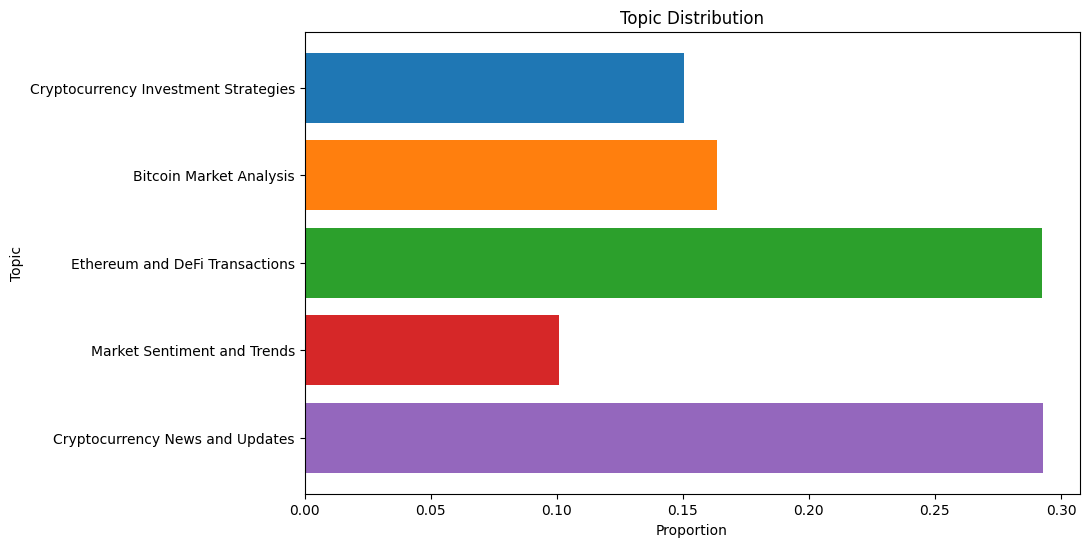

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate topic distribution
def calculate_topic_distribution(model, feature_names, n_top_words):
    topic_distribution = []
    for topic in model.components_:
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_distribution.append(top_words)
    return topic_distribution

# Calculate topic distribution
topic_distribution = calculate_topic_distribution(lda_model, feature_names, n_top_words)

# Plot topic distribution
plt.figure(figsize=(10, 6))
for index, topic_name in enumerate(topic_names):
    plt.barh(topic_name, lda_model.transform(dtm)[:, index].mean())
plt.xlabel('Proportion')
plt.ylabel('Topic')
plt.title('Topic Distribution')
plt.gca().invert_yaxis()  # Invert y-axis to have the first topic at the top
plt.show()

In [ ]:
# Get the number of rows in each DataFrame representing each year
rows_2021 = df_2021.shape[0]
rows_2022 = df_2022.shape[0]

# Print the number of rows for each year
print("Number of rows in 2021:", rows_2021)
print("Number of rows in 2022:", rows_2022)

Number of rows in 2021: 1108156
Number of rows in 2022: 1366701


DROPPING ALL THE ROWS WHICH HAVE MISSING DATA OR STRING DATA IN DATE COLUMN

PERFORMING TOKENIZATION

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Generator function to yield tokenized data in chunks
def tokenized_data_generator(df, chunk_size=20000):
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunk = df.iloc[i * chunk_size : (i + 1) * chunk_size].copy()
        chunk['tokens'] = chunk['text'].apply(tokenize_text)
        yield chunk

# Assuming df_2021 contains the DataFrame for the year 2021
# If not, replace df_2021 with your DataFrame containing data for the year 2021

# Define chunk size
chunk_size = 20000

# Create an empty list to store tokenized chunks
tokenized_chunks = []

# Iterate over tokenized data generator and process each chunk
for chunk in tokenized_data_generator(df_2021, chunk_size):
    tokenized_chunks.append(chunk)

# Concatenate tokenized chunks into a single DataFrame
df_tokenized1 = pd.concat(tokenized_chunks, ignore_index=True)

# Print the first few rows of the DataFrame with tokenized data
print(df_tokenized1.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


        date                                               text  \
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...   
1 2021-02-10  😎 today thats thursday 🎬 take friend leowander...   
2 2021-02-10               guys evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured nodes today soon biggest bears...   

                                              tokens  
0  [blue, ridge, bank, shares, halted, nyse, bitc...  
1  [😎, today, thats, thursday, 🎬, take, friend, l...  
2        [guys, evening, read, article, like, share]  
3     [big, chance, billion, price, bitcoin, crypto]  
4  [network, secured, nodes, today, soon, biggest...  


SAVING THIS IN CSV FILE

In [ ]:
# Save the tokenized dataframe to a CSV file
df_tokenized1.to_csv('/content/tokenized_data1.csv', index=False)


In [ ]:
print(df_tokenized1.head())

        date                                               text  \
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...   
1 2021-02-10  😎 today thats thursday 🎬 take friend leowander...   
2 2021-02-10               guys evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured nodes today soon biggest bears...   

                                              tokens  
0  [blue, ridge, bank, shares, halted, nyse, bitc...  
1  [😎, today, thats, thursday, 🎬, take, friend, l...  
2        [guys, evening, read, article, like, share]  
3     [big, chance, billion, price, bitcoin, crypto]  
4  [network, secured, nodes, today, soon, biggest...  


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')

# Function to tokenize text
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Generator function to yield tokenized data in chunks
def tokenized_data_generator(df, chunk_size=20000):
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunk = df.iloc[i * chunk_size : (i + 1) * chunk_size].copy()
        chunk['tokens'] = chunk['text'].apply(tokenize_text)
        yield chunk

# Assuming df_2021 contains the DataFrame for the year 2021
# If not, replace df_2021 with your DataFrame containing data for the year 2021

# Define chunk size
chunk_size = 20000

# Create an empty list to store tokenized chunks
tokenized_chunks = []

# Iterate over tokenized data generator and process each chunk
for chunk in tokenized_data_generator(df_2022, chunk_size):
    tokenized_chunks.append(chunk)

# Concatenate tokenized chunks into a single DataFrame
df_tokenized2 = pd.concat(tokenized_chunks, ignore_index=True)

# Print the first few rows of the DataFrame with tokenized data
print(df_tokenized2.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


        date                                               text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sats bitcoiners amazin...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  
0                      [death, cross, bitcoin, dump]  
1    [bitcoin, revolutionizing, insurance, industry]  
2       [teaser, bitcoin, cryptocurrency, furniture]  
3  [claiming, free, lightning, sats, bitcoiners, ...  
4  [mentalist, hey, please, check, hand, drawing,...  


In [ ]:
# Save the tokenized dataframe to a CSV file
df_tokenized2.to_csv('/content/tokenized_data2.csv', index=False)

In [ ]:
print(df_tokenized2.head())

        date                                               text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sats bitcoiners amazin...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  
0                      [death, cross, bitcoin, dump]  
1    [bitcoin, revolutionizing, insurance, industry]  
2       [teaser, bitcoin, cryptocurrency, furniture]  
3  [claiming, free, lightning, sats, bitcoiners, ...  
4  [mentalist, hey, please, check, hand, drawing,...  


In [ ]:
pip install symspellpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for editdistpy: filename=editdistpy-0.1.4-cp310-cp310-linux_x86_64.whl size=187493 sha256=ada0c2f51dbae963ac5e958f0480952e995a1cea61d108c94a94fa6bd1673c89
  Stored in directory: /root/.cache/pip/wheels/4c/0f/10/c20d67cd765ee5b3666d759a307241bba0663135d6ee1c0072
Successfully built editdistpy


In [ ]:
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell object
sym_spell = SymSpell()

# Load a frequency dictionary to improve suggestions
# You can download frequency dictionaries from https://github.com/mammothb/symspellpy/tree/master/symspellpy/frequency_dictionary_en_82_765.txt
# Adjust the path accordingly
dictionary_path = "frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Function to perform spell correction on a list of tokens
def correct_spelling(tokens):
    corrected_tokens = []
    for token in tokens:
        # Get the top suggestion for each token
        suggestion = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
        corrected_token = suggestion[0].term if suggestion else token
        corrected_tokens.append(corrected_token)
    return corrected_tokens

# Apply spell correction to the 'tokens' column
df_tokenized1['tokens_corrected'] = df_tokenized1['tokens'].apply(correct_spelling)

# Print the first few rows of the DataFrame with corrected tokens
print(df_tokenized1.head())


2024-04-22 18:52:16,621: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


        date                                               text  \
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...   
1 2021-02-10  😎 today thats thursday 🎬 take friend leowander...   
2 2021-02-10               guys evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured nodes today soon biggest bears...   

                                              tokens  \
0  [blue, ridge, bank, shares, halted, nyse, bitc...   
1  [😎, today, thats, thursday, 🎬, take, friend, l...   
2        [guys, evening, read, article, like, share]   
3     [big, chance, billion, price, bitcoin, crypto]   
4  [network, secured, nodes, today, soon, biggest...   

                                    tokens_corrected  
0  [blue, ridge, bank, shares, halted, nyse, bitc...  
1  [😎, today, thats, thursday, 🎬, take, friend, l...  
2        [guys, evening, read, article, like, share]  
3     [big, chance, billion, price, bitc

In [ ]:
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell object
sym_spell = SymSpell()

# Load a frequency dictionary to improve suggestions
# You can download frequency dictionaries from https://github.com/mammothb/symspellpy/tree/master/symspellpy/frequency_dictionary_en_82_765.txt
# Adjust the path accordingly
dictionary_path = "frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Function to perform spell correction on a list of tokens
def correct_spelling(tokens):
    corrected_tokens = []
    for token in tokens:
        # Get the top suggestion for each token
        suggestion = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2, include_unknown=True)
        corrected_token = suggestion[0].term if suggestion else token
        corrected_tokens.append(corrected_token)
    return corrected_tokens

# Apply spell correction to the 'tokens' column
df_tokenized2['tokens_corrected'] = df_tokenized2['tokens'].apply(correct_spelling)

# Print the first few rows of the DataFrame with corrected tokens
print(df_tokenized2.head())


2024-04-22 18:54:09,198: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


        date                                               text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sats bitcoiners amazin...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  \
0                      [death, cross, bitcoin, dump]   
1    [bitcoin, revolutionizing, insurance, industry]   
2       [teaser, bitcoin, cryptocurrency, furniture]   
3  [claiming, free, lightning, sats, bitcoiners, ...   
4  [mentalist, hey, please, check, hand, drawing,...   

                                    tokens_corrected  
0                      [death, cross, bitcoin, dump]  
1    [bitcoin, revolutionizing, insurance, industry]  
2       [teaser, bitcoin, cryptocurrency, furniture]  
3  [claiming, free, lightning, sats, bit

In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
df_tokenized1 = df_tokenized1.loc[:, ['date', 'tokens_corrected']]

# Print the first few rows of the DataFrame with only the desired columns
print(df_tokenized1.head())


        date                                   tokens_corrected
0 2021-02-10  [blue, ridge, bank, shares, halted, nyse, bitc...
1 2021-02-10  [😎, today, thats, thursday, 🎬, take, friend, l...
2 2021-02-10        [guys, evening, read, article, like, share]
3 2021-02-10     [big, chance, billion, price, bitcoin, crypto]
4 2021-02-10  [network, secured, nodes, today, soon, biggest...


In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
df_tokenized2 = df_tokenized2.loc[:, ['date', 'tokens_corrected']]

# Print the first few rows of the DataFrame with only the desired columns
print(df_tokenized2.head())

        date                                   tokens_corrected
0 2022-01-14                      [death, cross, bitcoin, dump]
1 2022-01-14    [bitcoin, revolutionizing, insurance, industry]
2 2022-01-14       [teaser, bitcoin, cryptocurrency, furniture]
3 2022-01-14  [claiming, free, lightning, sats, bitcoiners, ...
4 2022-01-14  [mentalist, hey, please, check, hand, drawing,...


In [ ]:
# Check the number of rows in the DataFrame
num_rows = len(df_tokenized1)
print("Number of rows:", num_rows)


Number of rows: 1108156


In [ ]:
# Check the row with serial number 1528408
row_1528408 = df_tokenized1.iloc[1064392]

# Print the row
print(row_1528408)


date                                              2021-12-17 00:00:00
tokens_corrected    [nothing, changed, yet, soon, youll, start, se...
Name: 1064392, dtype: object


In [ ]:
# Drop rows with missing values in the 'tokens_corrected' column
tokenized_cleaned = df_tokenized1.dropna(subset=['tokens_corrected'])

# Filter the DataFrame based on the presence of specific emojis in the 'tokens_corrected' column
result = tokenized_cleaned[tokenized_cleaned["tokens_corrected"].apply(lambda x: any(emoji in x for emoji in ["💹","📈","🔥","🚀","💰","📊","📉","🔻","💸","📈","💴","🚨","💲","👍","😎","⬆️","👎","💷","💶","🚀","💎","🥂","🍻","🍾","🎉","🎊","✨","🤑","🥳","😀","😃","😄","😁","😆","😊","🥰","😍","🤩","😨","😰","😢","😭","😱","😞","😩","😫","😡","😠","🤬","🔼","🔺","✅","✔","⛔","🚫","↘","⬇","🔽","🔻","❌","❎"]))]

# Print the filtered DataFrame
print(result)


              date                                   tokens_corrected
1       2021-02-10  [😎, today, thats, thursday, 🎬, take, friend, l...
5       2021-02-10  [💹, trade, crypto, binance, 📌, enjoy, cashback...
14      2021-02-10  [⬆️⬆️, buying, pressure, alert, 📈, price, trad...
46      2021-02-10               [thats, tweet, 🚀, bitcoin, dogecoin]
59      2021-02-10  [⬆️⬆️, buying, pressure, alert, 📈, price, trad...
...            ...                                                ...
1108078 2021-12-29  [made, ton, 💰, lost, leverage, got, hacked, ku...
1108093 2021-12-29  [axieinfinity, 📉, compare, hour, ago, 📉, compa...
1108127 2021-12-29  [macd, reversal, forming, weak, most, importan...
1108130 2021-12-29                [investing, crypto, tesla, gems, 💎]
1108153 2021-12-29  [🔒, x, acceldefi, launching, soon, 🚀, accel, e...

[66829 rows x 2 columns]


In [ ]:
# Drop rows with missing values in the 'tokens_corrected' column
tokenized_cleaned = df_tokenized2.dropna(subset=['tokens_corrected'])

# Filter the DataFrame based on the presence of specific emojis in the 'tokens_corrected' column
result = tokenized_cleaned[tokenized_cleaned["tokens_corrected"].apply(lambda x: any(emoji in x for emoji in ["💹","📈","🔥","🚀","💰","📊","📉","🔻","💸","📈","💴","🚨","💲","👍","😎","⬆️","👎","💷","💶","🚀","💎","🥂","🍻","🍾","🎉","🎊","✨","🤑","🥳","😀","😃","😄","😁","😆","😊","🥰","😍","🤩","😨","😰","😢","😭","😱","😞","😩","😫","😡","😠","🤬","🔼","🔺","✅","✔","⛔","🚫","↘","⬇","🔽","🔻","❌","❎"]))]

# Print the filtered DataFrame
print(result)

              date                                   tokens_corrected
29      2022-01-14  [riodejaneiro, announced, buy, bitcoin, store,...
44      2022-01-14       [bitcoin, 📈, ▓▓▓▓▓▓▓░░░░░░░░, price, ethbtc]
47      2022-01-14  [🟩, block, ⛏, ⛏, 📅, th, 📣, value, b, 📣, distri...
69      2022-01-14  [started, daily, activity, contest, daily, inv...
128     2022-01-14                [ready, tonights, bitcoin, news, 🚀]
...            ...                                                ...
1366637 2022-11-07  [binance, last, price, 🚀, weekly, indicators, ...
1366662 2022-11-07  [binance, last, price, 🚀, daily, indicators, v...
1366673 2022-11-07  [🗞, qeheadlinesrussia, disconnect, internet, 💻...
1366679 2022-11-07                           [monster, fake, outs, 😱]
1366687 2022-12-27  [syscoin, follow, warrens, rules, ✅, always, b...

[117544 rows x 2 columns]


In [ ]:
def filter_and_concat(tokens):
    # List of allowed emojis
    allowed_emojis = ["💹","📈","🔥","🚀","💰","📊","📉","🔻","💸","📈","💴","🚨","💲",
                      "👍","😎","⬆️","👎","💷","💶","💎","🥂","🍻","🍾","🎉","🎊","✨",
                      "🤑","🥳","😀","😃","😄","😁","😆","😊","🥰","😍","🤩","😨","😰",
                      "😭","😱","😞","😩","😫","😡","😠","🤬","🔼","🔺","✅","✔","⛔",
                      "🚫","↘","⬇","🔽","🔻","❌","❎"]

    # Filter tokens to include only those containing allowed emojis or words
    selected_combined = [token for token in tokens if any(emoji in token for emoji in allowed_emojis) or token.isalpha()]

    return ' '.join(selected_combined)

# Apply the function to create a 'selected_combined' column
df_tokenized1['selected_combined'] = df_tokenized1['tokens_corrected'].apply(filter_and_concat)

# Display the DataFrame to verify the new 'selected_combined' column content
print(df_tokenized1[['selected_combined']])

                                         selected_combined
0        blue ridge bank shares halted nyse bitcoin ann...
1        😎 today thats thursday take friend leowandersl...
2                     guys evening read article like share
3                  big chance billion price bitcoin crypto
4        network secured nodes today soon biggest bears...
...                                                    ...
1108151  olegbarcas stream live mins hunting level prom...
1108152  crypto misttoken symbol mistswap mistswap twit...
1108153  x acceldefi launching soon 🚀 accel ethereum cr...
1108154  bitboycrypto inari trailer video released toke...
1108155             cnbc crypto special tonight know means

[1108156 rows x 1 columns]


In [ ]:
def filter_and_concat(tokens):
    # List of allowed emojis
    allowed_emojis = ["💹","📈","🔥","🚀","💰","📊","📉","🔻","💸","📈","💴","🚨","💲",
                      "👍","😎","⬆️","👎","💷","💶","💎","🥂","🍻","🍾","🎉","🎊","✨",
                      "🤑","🥳","😀","😃","😄","😁","😆","😊","🥰","😍","🤩","😨","😰",
                      "😭","😱","😞","😩","😫","😡","😠","🤬","🔼","🔺","✅","✔","⛔",
                      "🚫","↘","⬇","🔽","🔻","❌","❎"]

    # Filter tokens to include only those containing allowed emojis or words
    selected_combined = [token for token in tokens if any(emoji in token for emoji in allowed_emojis) or token.isalpha()]

    return ' '.join(selected_combined)

# Apply the function to create a 'selected_combined' column
df_tokenized2['selected_combined'] = df_tokenized2['tokens_corrected'].apply(filter_and_concat)

# Display the DataFrame to verify the new 'selected_combined' column content
print(df_tokenized2[['selected_combined']])


                                         selected_combined
0                                 death cross bitcoin dump
1               bitcoin revolutionizing insurance industry
2                  teaser bitcoin cryptocurrency furniture
3        claiming free lightning sats bitcoiners amazin...
4        mentalist hey please check hand drawing item f...
...                                                    ...
1366696  decide whether issue digital euro finance bitc...
1366697  biggest bitcoin controversy elevennine chinaba...
1366698  bitcoin big fail becoming selffulfilling proph...
1366699  dad years ago son whats price bitcoin now me a...
1366700  top cryptocurrency price jumps last minute gateio

[1366701 rows x 1 columns]


In [ ]:
# Access the row at index 5
row_5 = df_tokenized1.iloc[5]

# Print the selected row
print(row_5)

date                                               2021-02-10 00:00:00
tokens_corrected     [💹, trade, crypto, binance, 📌, enjoy, cashback...
selected_combined    💹 trade crypto binance enjoy cashback trading ...
Name: 5, dtype: object


In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
df_tokenized1 = df_tokenized1.loc[:, ['date', 'selected_combined']]

# Print the first few rows of the DataFrame with only the desired columns
print(df_tokenized1.head())

        date                                  selected_combined
0 2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1 2021-02-10  😎 today thats thursday take friend leowandersl...
2 2021-02-10               guys evening read article like share
3 2021-02-10            big chance billion price bitcoin crypto
4 2021-02-10  network secured nodes today soon biggest bears...


In [ ]:
# Save the tokenized dataframe to a CSV file
df_tokenized1.to_csv('/content/selected_combined1.csv', index=False)

In [ ]:
print(df_tokenized1)

              date                                  selected_combined
0       2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1       2021-02-10  😎 today thats thursday take friend leowandersl...
2       2021-02-10               guys evening read article like share
3       2021-02-10            big chance billion price bitcoin crypto
4       2021-02-10  network secured nodes today soon biggest bears...
...            ...                                                ...
1108151 2021-12-29  olegbarcas stream live mins hunting level prom...
1108152 2021-12-29  crypto misttoken symbol mistswap mistswap twit...
1108153 2021-12-29  x acceldefi launching soon 🚀 accel ethereum cr...
1108154 2021-12-29  bitboycrypto inari trailer video released toke...
1108155 2021-12-29             cnbc crypto special tonight know means

[1108156 rows x 2 columns]


In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
df_tokenized2 = df_tokenized2.loc[:, ['date', 'selected_combined']]

# Print the first few rows of the DataFrame with only the desired columns
print(df_tokenized2.head())

        date                                  selected_combined
0 2022-01-14                           death cross bitcoin dump
1 2022-01-14         bitcoin revolutionizing insurance industry
2 2022-01-14            teaser bitcoin cryptocurrency furniture
3 2022-01-14  claiming free lightning sats bitcoiners amazin...
4 2022-01-14  mentalist hey please check hand drawing item f...


In [ ]:
# Save the tokenized dataframe to a CSV file
df_tokenized2.to_csv('/content/selected_combined2.csv', index=False)

In [ ]:
print(df_tokenized1)

              date                                  selected_combined
0       2021-02-10  blue ridge bank shares halted nyse bitcoin ann...
1       2021-02-10  😎 today thats thursday take friend leowandersl...
2       2021-02-10               guys evening read article like share
3       2021-02-10            big chance billion price bitcoin crypto
4       2021-02-10  network secured nodes today soon biggest bears...
...            ...                                                ...
1108151 2021-12-29  olegbarcas stream live mins hunting level prom...
1108152 2021-12-29  crypto misttoken symbol mistswap mistswap twit...
1108153 2021-12-29  x acceldefi launching soon 🚀 accel ethereum cr...
1108154 2021-12-29  bitboycrypto inari trailer video released toke...
1108155 2021-12-29             cnbc crypto special tonight know means

[1108156 rows x 2 columns]


In [ ]:
print(df_tokenized1['selected_combined'].dtype)

object


In [ ]:
print(df_tokenized1['selected_combined'].isnull().sum())


0


PERFORMING LEMMATIZATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize text
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Function to lemmatize text
def lemmatize_text(text):
    tokens = tokenize_text(text)
    lemmatized_tokens = lemmatize_tokens(tokens)
    return ' '.join(lemmatized_tokens)

# Load the DataFrame containing selected combined text
# Replace '/content/tokenized_data.csv' with the actual path to your CSV file
# Load the dataset from Google Drive
lemmatized1 = pd.read_csv('/content/drive/My Drive/lemmatized/selected_combined1.csv')


# Drop rows with missing values in the 'selected_combined' column
lemmatized1 = lemmatized1.dropna(subset=['selected_combined'])

# Apply lemmatization to the 'selected_combined' column
lemmatized1['lemmatized_text'] = lemmatized1['selected_combined'].apply(lemmatize_text)

# Print the first few rows of the DataFrame with lemmatized text
print(lemmatized1[['lemmatized_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                     lemmatized_text
0  blue ridge bank share halted nyse bitcoin anno...
1  😎 today thats thursday take friend leowandersl...
2                guy evening read article like share
3            big chance billion price bitcoin crypto
4  network secured node today soon biggest bear r...


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize text
def tokenize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    return tokens

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Function to lemmatize text
def lemmatize_text(text):
    tokens = tokenize_text(text)
    lemmatized_tokens = lemmatize_tokens(tokens)
    return ' '.join(lemmatized_tokens)

# Load the DataFrame containing selected combined text
# Replace '/content/tokenized_data.csv' with the actual path to your CSV file
lemmatized2 = pd.read_csv('/content/selected_combined2.csv')

# Drop rows with missing values in the 'selected_combined' column
lemmatized2 = lemmatized2.dropna(subset=['selected_combined'])

# Apply lemmatization to the 'selected_combined' column
lemmatized2['lemmatized_text'] = lemmatized2['selected_combined'].apply(lemmatize_text)

# Print the first few rows of the DataFrame with lemmatized text
print(lemmatized2[['lemmatized_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                     lemmatized_text
0                           death cross bitcoin dump
1         bitcoin revolutionizing insurance industry
2            teaser bitcoin cryptocurrency furniture
3  claiming free lightning sat bitcoiners amazing...
4  mentalist hey please check hand drawing item f...


In [ ]:
print(lemmatized1)

               date                                  selected_combined  \
0        2021-02-10  blue ridge bank shares halted nyse bitcoin ann...   
1        2021-02-10  😎 today thats thursday take friend leowandersl...   
2        2021-02-10               guys evening read article like share   
3        2021-02-10            big chance billion price bitcoin crypto   
4        2021-02-10  network secured nodes today soon biggest bears...   
...             ...                                                ...   
1108151  2021-12-29  olegbarcas stream live mins hunting level prom...   
1108152  2021-12-29  crypto misttoken symbol mistswap mistswap twit...   
1108153  2021-12-29  x acceldefi launching soon 🚀 accel ethereum cr...   
1108154  2021-12-29  bitboycrypto inari trailer video released toke...   
1108155  2021-12-29             cnbc crypto special tonight know means   

                                           lemmatized_text  
0        blue ridge bank share halted nyse bitcoin

In [ ]:
print(lemmatized2)

               date                                  selected_combined  \
0        2022-01-14                           death cross bitcoin dump   
1        2022-01-14         bitcoin revolutionizing insurance industry   
2        2022-01-14            teaser bitcoin cryptocurrency furniture   
3        2022-01-14  claiming free lightning sats bitcoiners amazin...   
4        2022-01-14  mentalist hey please check hand drawing item f...   
...             ...                                                ...   
1366696  2022-12-27  decide whether issue digital euro finance bitc...   
1366697  2022-12-27  biggest bitcoin controversy elevennine chinaba...   
1366698  2022-12-27  bitcoin big fail becoming selffulfilling proph...   
1366699  2022-12-27  dad years ago son whats price bitcoin now me a...   
1366700  2022-12-27  top cryptocurrency price jumps last minute gateio   

                                           lemmatized_text  
0                                 death cross bitc

In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
lemmatized1 = lemmatized1.loc[:, ['date', 'lemmatized_text']]

# Print the first few rows of the DataFrame with only the desired columns
print(lemmatized1.head())

         date                                    lemmatized_text
0  2021-02-10  blue ridge bank share halted nyse bitcoin anno...
1  2021-02-10  😎 today thats thursday take friend leowandersl...
2  2021-02-10                guy evening read article like share
3  2021-02-10            big chance billion price bitcoin crypto
4  2021-02-10  network secured node today soon biggest bear r...


In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
lemmatized2 = lemmatized2.loc[:, ['date', 'lemmatized_text']]

# Print the first few rows of the DataFrame with only the desired columns
print(lemmatized2.head())

         date                                    lemmatized_text
0  2022-01-14                           death cross bitcoin dump
1  2022-01-14         bitcoin revolutionizing insurance industry
2  2022-01-14            teaser bitcoin cryptocurrency furniture
3  2022-01-14  claiming free lightning sat bitcoiners amazing...
4  2022-01-14  mentalist hey please check hand drawing item f...


SAVING IT IN CSV FORMAT

In [ ]:
# Save the tokenized dataframe to a CSV file
lemmatized1.to_csv('/content/lemmatized_text1.csv', index=False)

In [ ]:
# Save the tokenized dataframe to a CSV file
lemmatized2.to_csv('/content/lemmatized_text2.csv', index=False)

WORD EMBEDDING

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


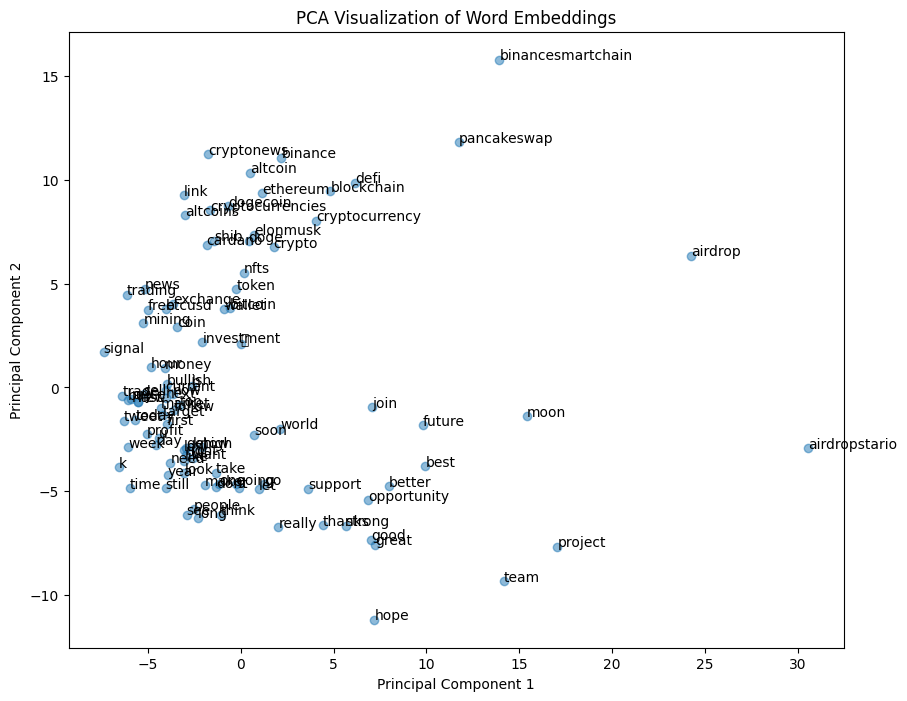

Word embedding completed and model saved.


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the DataFrame containing lemmatized text
# Replace '/content/lemmatized_text.csv' with the actual path to your CSV file
word_embedding2 = pd.read_csv('/content/lemmatized_text1.csv')

# Tokenize the lemmatized text
word_embedding2['tokens'] = word_embedding2['lemmatized_text'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=word_embedding2['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Access the Word2Vec embeddings
word_vectors = word2vec_model.wv

# Visualize Word Embeddings using PCA
def display_pca_scatterplot(word_vectors, sample_size=100):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors.vectors[:sample_size])
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    words = list(word_vectors.index_to_key)[:sample_size]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Word Embeddings')
    plt.show()

# Display PCA scatterplot of word embeddings
display_pca_scatterplot(word_vectors)

# Save Word2Vec model
word2vec_model.save('/content/word2vec_model')

# Print message indicating completion
print("Word embedding completed and model saved.")

In [ ]:
# Find words most similar to a given word
similar_words = word2vec_model.wv.most_similar('bitcoin', topn=5)
print("Words most similar to 'bitcoin':", similar_words)


Words most similar to 'bitcoin': [('crypto', 0.6858626008033752), ('bitcoins', 0.6219738721847534), ('cryptocurrencies', 0.5954992175102234), ('ethereum', 0.5756519436836243), ('altcoins', 0.5597571134567261)]


In [ ]:
from sklearn.cluster import KMeans

# Cluster word vectors using KMeans
num_clusters = 5
kmeans_model = KMeans(n_clusters=num_clusters)
kmeans_model.fit(word_vectors.vectors)
cluster_labels = kmeans_model.labels_

# Print words in each cluster
for i in range(num_clusters):
    cluster_words = [word for word, label in zip(word_vectors.index_to_key, cluster_labels) if label == i]
    print(f"Cluster {i+1}:", cluster_words)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1: ['moon', 'success', 'nftcommunity', 'successful', 'nftcollector', 'czbinance', 'wonderful', 'luck', 'avax', 'trending', 'hey', 'etherium', 'aave', 'cryptocurrencynews', 'congratulation', 'sir', 'glad', 'cake', 'cashapp', 'lucky', '🚀🚀', 'cosmos', 'uniswap', 'shared', 'joined', 'saitama', 'symbol', 'bright', 'atom', 'planned', 'nanodogecoin', 'beautiful', 'longed', 'bitcoinsv', 'quant', 'openingceremony', 'hello', 'arbitrage', 'morbex', 'faced', 'davidgokhshtein', 'roadmap', 'strongly', 'cro', 'hi', 'keyfund', '😍', 'cryptoislandinc', 'wan', 'am', 'implemented', 'fantastic', 'xrpcommunity', 'cryptoisland', '🚀🚀🚀🚀', 'massively', 'helpful', 'tag', 'cryptocom', 'p', 'sand', 'altcoinseason', 'congrats', 'coti', 'kraken', 'mar', 'btctn', 'ama', 'algorand', 'loading', 'subscribe', 'altcoindailyio', 'rank', '⬆️', 'ashwsbreal', 'rewarding', 'avalanche', 'alpha', 'dear', 'krakenfx', '💸', 'overbought', 'indc', 'shes', 'satoshinakamoto', 'victory', 'blackfriday', 'cryptomarket', 'deeper', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Cluster 4: ['project', 'cryptocurrency', 'blockchain', 'defi', 'team', 'join', 'best', 'nfts', 'cryptonews', 'free', 'exchange', 'world', 'investment', 'mining', 'wallet', 'thanks', 'via', 'forex', 'gift', 'earn', 'coinbase', 'platform', 'finance', 'currency', 'amazing', 'user', 'use', 'work', 'block', 'community', 'part', 'litecoin', 'technology', 'network', 'reward', 'bank', 'business', 'nftart', 'olympicgames', 'covidvaccine', 'digital', 'plan', 'thank', 'transaction', 'jack', 'ripple', 'staking', 'fintech', 'help', 'tron', 'polygon', 'excellent', 'olympics', 'company', 'fund', 'shop', 'idea', 'financial', 'location', 'metaverse', 'launch', 'shopping', 'social', 'account', 'fee', 'development', 'facebook', 'friend', 'art', 'bitcoinnews', 'deal', 'tokyo', 'using', 'youtube', 'decentralized', 'together', 'goal', 'payment', 'medium', 'fix', 'learn', 'card', 'miner', 'video', 'system', 'pay', 'chainlink', 'become', 'bitcoincash', 'experience', 'global', 'giving', 'cash', 'energy', 'paid

In [ ]:
# Perform word analogy
analogy_result = word2vec_model.wv.most_similar(positive=['increase', 'bitcoin'], negative=['bad','downfall'], topn=1)
print("Word analogy result:", analogy_result)


Word analogy result: [('bsclaunchpad', 0.49332377314567566)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


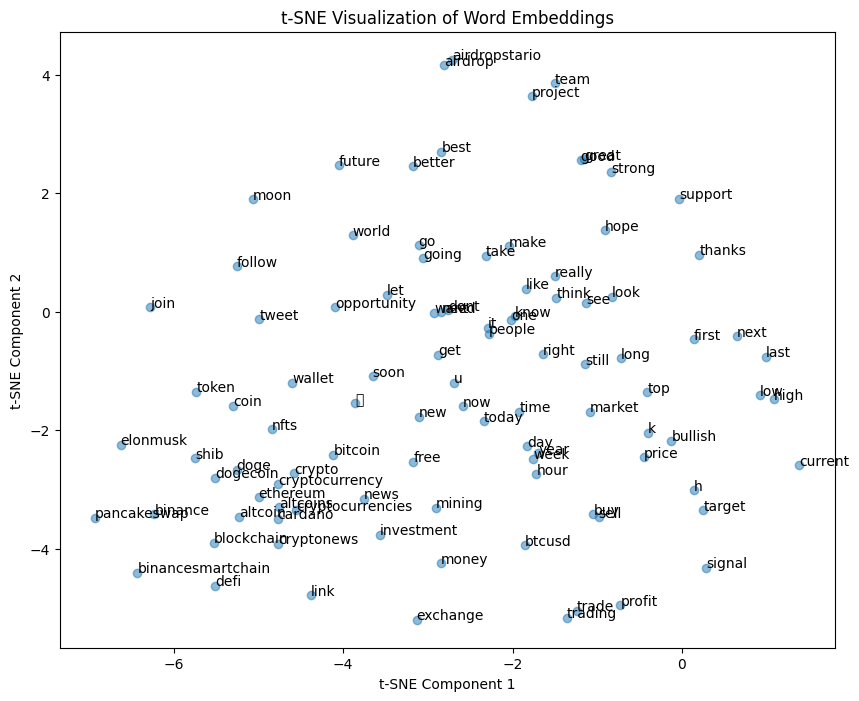

In [ ]:
from sklearn.manifold import TSNE

# Visualize word embeddings using t-SNE
def display_tsne_visualization(word_vectors, num_words=100):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_tsne = tsne.fit_transform(word_vectors.vectors[:num_words])
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
    words = list(word_vectors.index_to_key)[:num_words]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

# Display t-SNE visualization of word embeddings
display_tsne_visualization(word_vectors)

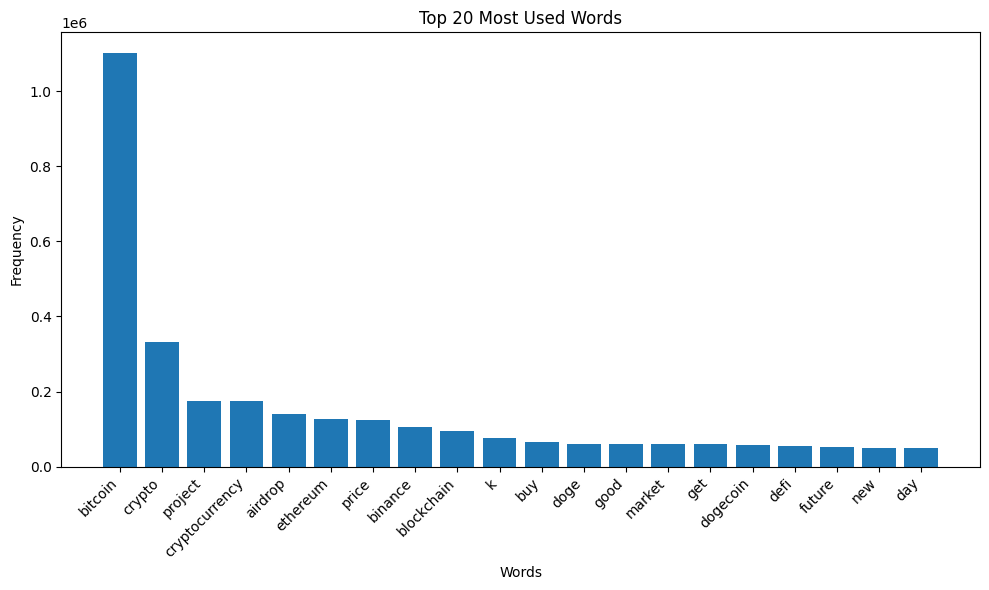

In [ ]:
from collections import Counter

# Count the frequency of each word in the corpus
word_freq = Counter(word_embedding2['tokens'].explode())

# Select the top N most frequent words
top_n = 20  # Change this value as needed
most_common_words = word_freq.most_common(top_n)

# Extract words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Used Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TEXTBLOB

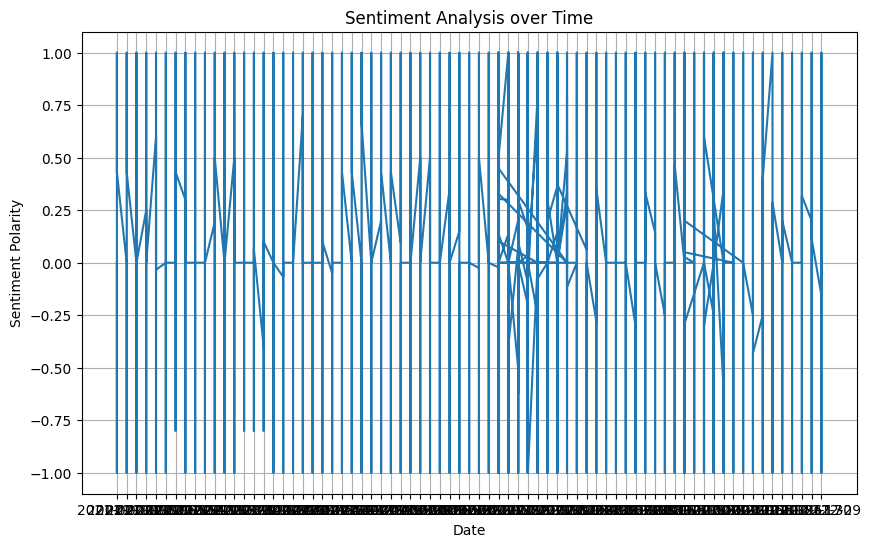

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each row in the DataFrame
word_embedding2['sentiment'] = word_embedding2['lemmatized_text'].apply(calculate_sentiment)

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(word_embedding2['date'], word_embedding2['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis over Time')
plt.grid(True)
plt.show()

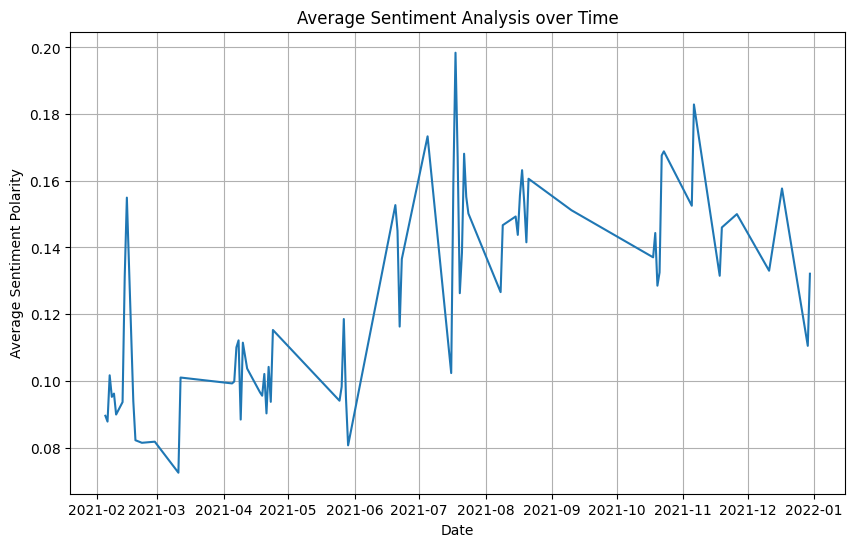

In [ ]:
# Convert 'date' column to datetime format
word_embedding2['date'] = pd.to_datetime(word_embedding2['date'])

# Group the data by date and calculate the average sentiment for each date
sentiment_by_date = word_embedding2.groupby('date')['sentiment'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date['date'], sentiment_by_date['sentiment'])
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Analysis over Time')
plt.grid(True)
plt.show()


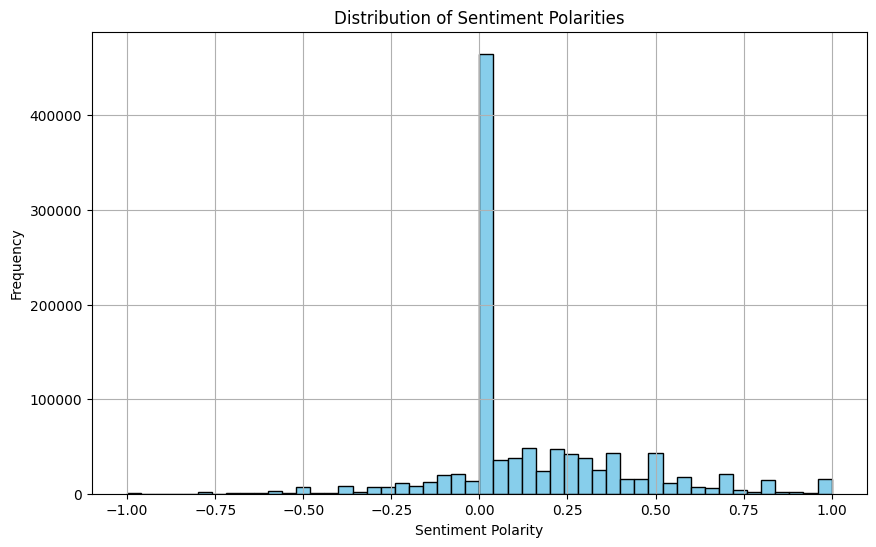

In [ ]:
# Plot the distribution of sentiment polarities
plt.figure(figsize=(10, 6))
plt.hist(word_embedding2['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarities')
plt.grid(True)
plt.show()

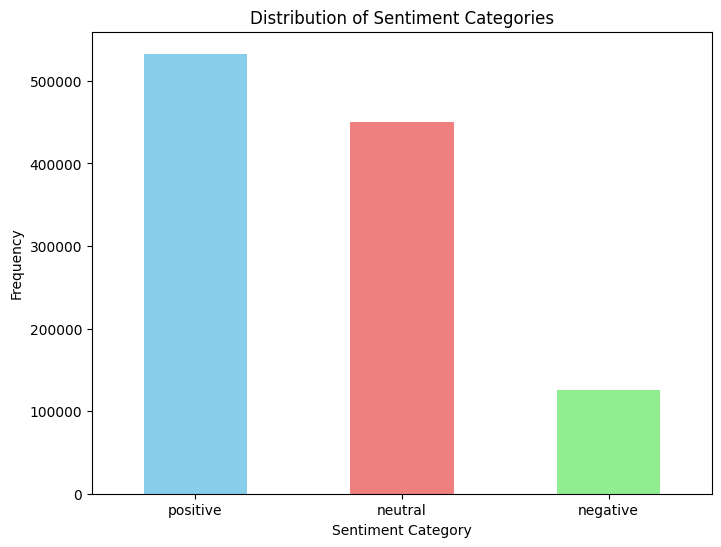

In [ ]:
# Function to categorize sentiment polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization to each row in the DataFrame
word_embedding2['sentiment_category'] = word_embedding2['sentiment'].apply(categorize_sentiment)

# Count the frequency of each sentiment category
sentiment_counts = word_embedding2['sentiment_category'].value_counts()

# Plot the bar graph of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.xticks(rotation=0)
plt.show()

In [ ]:
word_embedding2.head()

date                                    lemmatized_text  \
0 2021-02-10  blue ridge bank share halted nyse bitcoin anno...   
1 2021-02-10  😎 today thats thursday take friend leowandersl...   
2 2021-02-10                guy evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured node today soon biggest bear r...   

                                              tokens  sentiment  \
0  [blue, ridge, bank, share, halted, nyse, bitco...       0.00   
1  [😎, today, thats, thursday, take, friend, leow...       0.00   
2         [guy, evening, read, article, like, share]       0.00   
3     [big, chance, billion, price, bitcoin, crypto]       0.00   
4  [network, secured, node, today, soon, biggest,...      -0.25   

  sentiment_category  
0            neutral  
1            neutral  
2            neutral  
3            neutral  
4           negative

In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
word_embedding2 = word_embedding2.loc[:, ['date', 'lemmatized_text','tokens','sentiment','sentiment_category']]

# Print the first few rows of the DataFrame with only the desired columns
print(word_embedding2.head())

        date                                    lemmatized_text  \
0 2021-02-10  blue ridge bank share halted nyse bitcoin anno...   
1 2021-02-10  😎 today thats thursday take friend leowandersl...   
2 2021-02-10                guy evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured node today soon biggest bear r...   

                                              tokens  sentiment  \
0  [blue, ridge, bank, share, halted, nyse, bitco...       0.00   
1  [😎, today, thats, thursday, take, friend, leow...       0.00   
2         [guy, evening, read, article, like, share]       0.00   
3     [big, chance, billion, price, bitcoin, crypto]       0.00   
4  [network, secured, node, today, soon, biggest,...      -0.25   

  sentiment_category  
0            neutral  
1            neutral  
2            neutral  
3            neutral  
4           negative  


extracting price

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Replace 'created_at' with the actual column name containing the dates in your dataset
date_column =word_embedding2['date']

# Find the minimum and maximum dates in the dataset
start_date = date_column.min()
end_date = date_column.max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2021-02-05 00:00:00
End Date: 2021-12-30 00:00:00


In [ ]:
import yfinance as yf

# Define the ticker symbol for Bitcoin
ticker_symbol = "BTC-USD"

# Define the start and end dates for the historical data
start_date = "2021-02-05"
end_date = "2021-12-30"

# Fetch the historical data for Bitcoin from Yahoo Finance
btc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the fetched data
print(btc_data)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   
...                  ...           ...           ...           ...   
2021-12-25  50854.917969  51176.597656  50236.707031  50429.859375   
2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   

               Adj Close        Volume  
Date                                    
2021-02

In [ ]:
word_embedding2['date'] = pd.to_datetime(word_embedding2['date'])

In [ ]:
merged_data2= pd.merge(word_embedding2, btc_data, left_on='date', right_index=True, how='inner')

In [ ]:
print(merged_data2.head)

<bound method NDFrame.head of               date                                    lemmatized_text  \
0       2021-02-10  blue ridge bank share halted nyse bitcoin anno...   
1       2021-02-10  😎 today thats thursday take friend leowandersl...   
2       2021-02-10                guy evening read article like share   
3       2021-02-10            big chance billion price bitcoin crypto   
4       2021-02-10  network secured node today soon biggest bear r...   
...            ...                                                ...   
1108094 2021-12-29  olegbarcas stream live min hunting level promo...   
1108095 2021-12-29  crypto misttoken symbol mistswap mistswap twit...   
1108096 2021-12-29  x acceldefi launching soon 🚀 accel ethereum cr...   
1108097 2021-12-29  bitboycrypto inari trailer video released toke...   
1108098 2021-12-29              cnbc crypto special tonight know mean   

                                                    tokens  sentiment  \
0        [blue, ridg

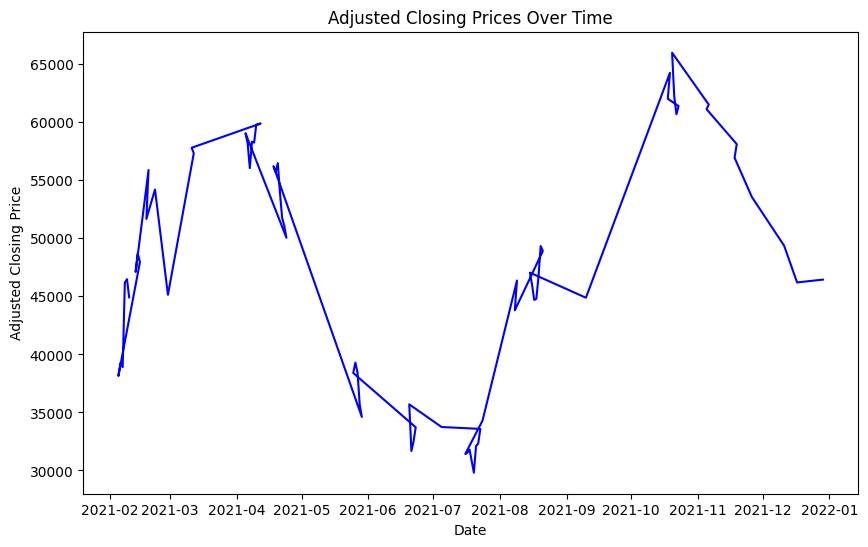

In [ ]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(merged_data2['date'], merged_data2['Adj Close'], color='blue')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

In [ ]:
# Save the tokenized dataframe to a CSV file
merged_data2.to_csv('/content/merged_data2.csv', index=False)

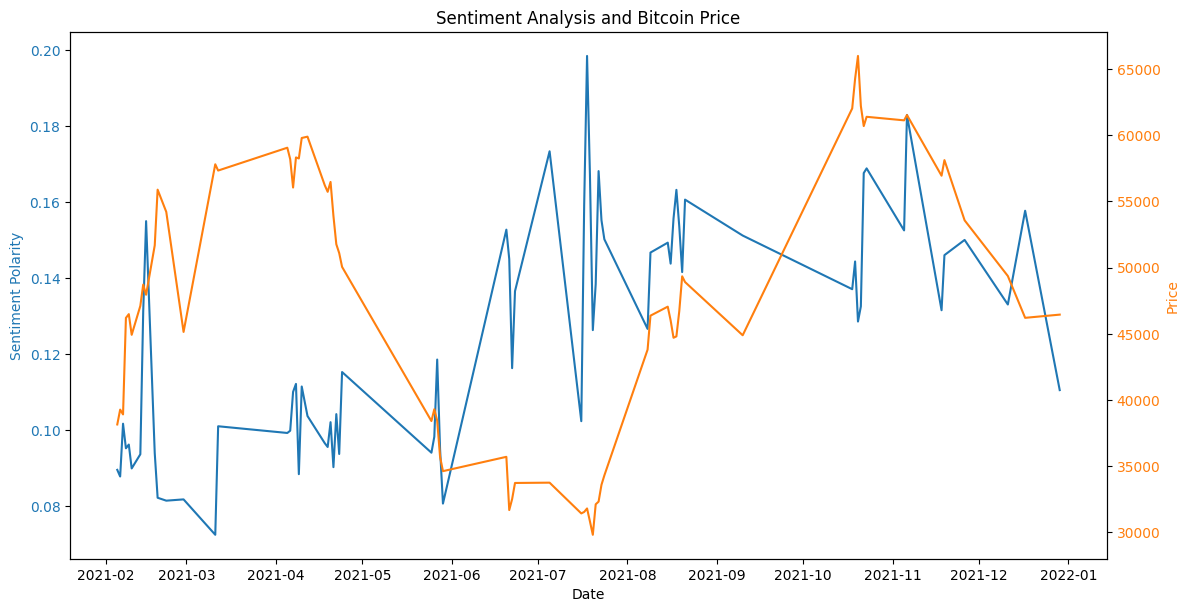

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('/content/merged_data2.csv')

# Convert the date column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group data by date and calculate average sentiment polarity and price
daily_sentiment = combined_data.groupby('date')['sentiment'].mean()
daily_price = combined_data.groupby('date')['Close'].mean()

# Plot both sentiment polarity and Bitcoin price on the same graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Polarity', color=color)
ax1.plot(daily_sentiment.index, daily_sentiment.values, label='Sentiment Polarity', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Price', color=color)
ax2.plot(daily_price.index, daily_price.values, label='Bitcoin Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Sentiment Analysis and Bitcoin Price')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/merged_data2.csv')

# Calculate the correlation coefficient between sentiment and Bitcoin price
correlation = data['sentiment'].corr(data['Close'])

print("Correlation coefficient between sentiment and Bitcoin price:", correlation)


Correlation coefficient between sentiment and Bitcoin price: 0.0004906607538283147


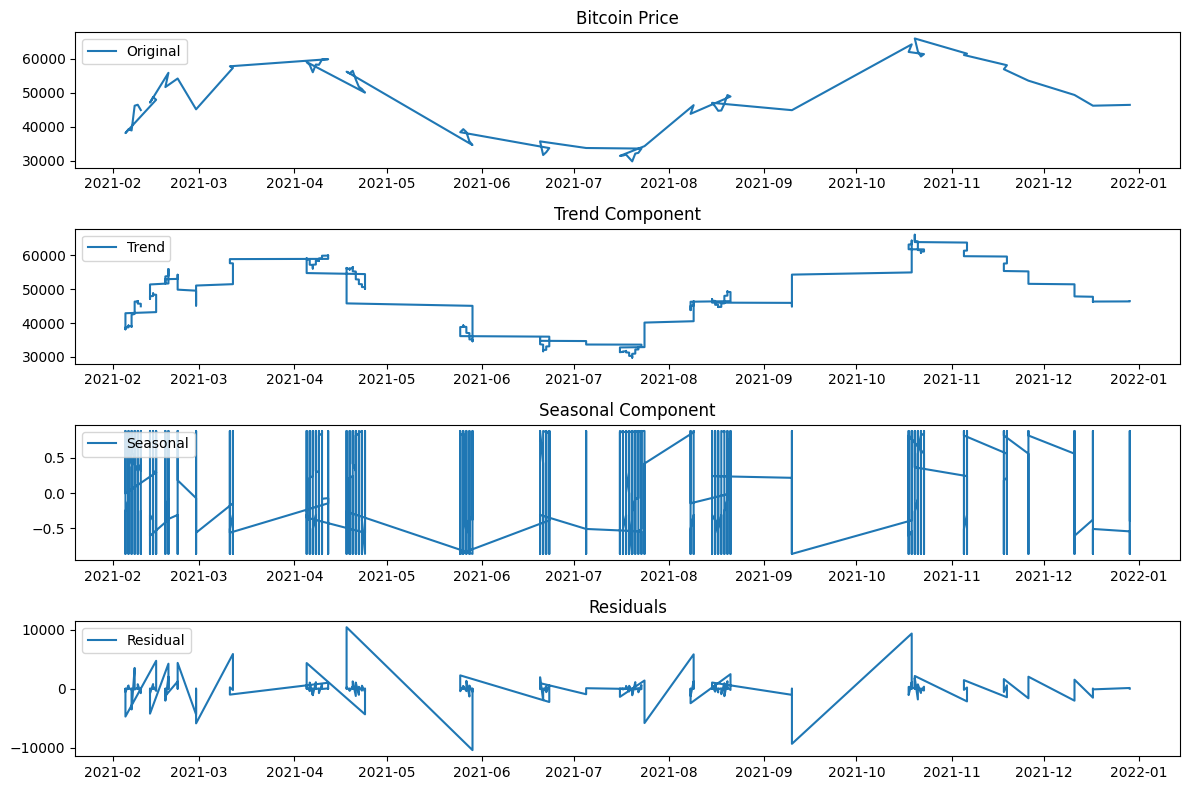

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('/content/merged_data2.csv')

# Convert 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # Assuming a period of 30 days

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Bitcoin Price')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()


vedar

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


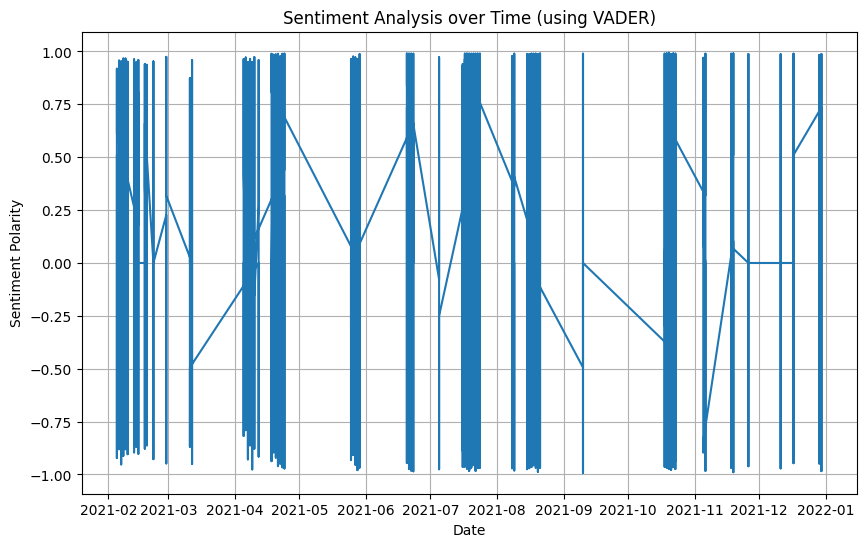

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment polarity using VADER
def calculate_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to each row in the DataFrame
word_embedding2['sentiment'] = word_embedding2['lemmatized_text'].apply(calculate_sentiment)

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(word_embedding2['date'], word_embedding2['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis over Time (using VADER)')
plt.grid(True)
plt.show()


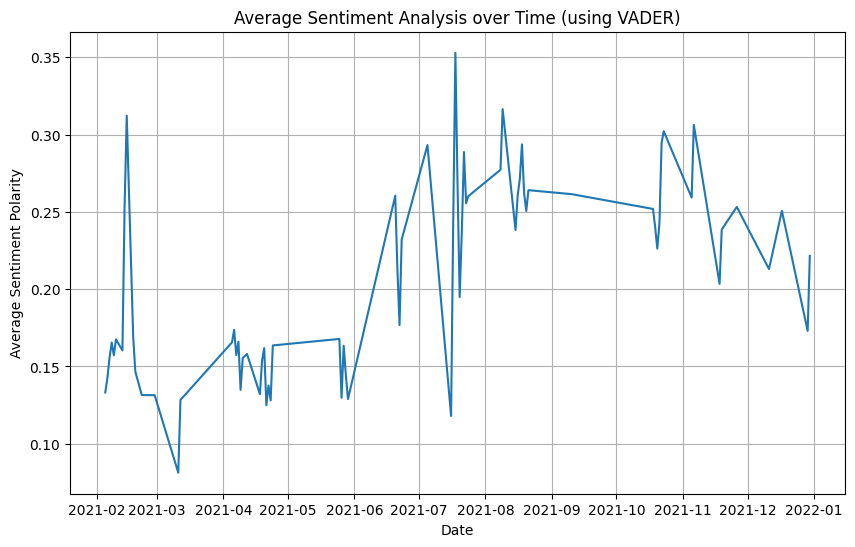

In [ ]:
# Group the data by date and calculate the average sentiment for each date
sentiment_by_date = word_embedding2.groupby('date')['sentiment'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date['date'], sentiment_by_date['sentiment'])
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Analysis over Time (using VADER)')
plt.grid(True)
plt.show()

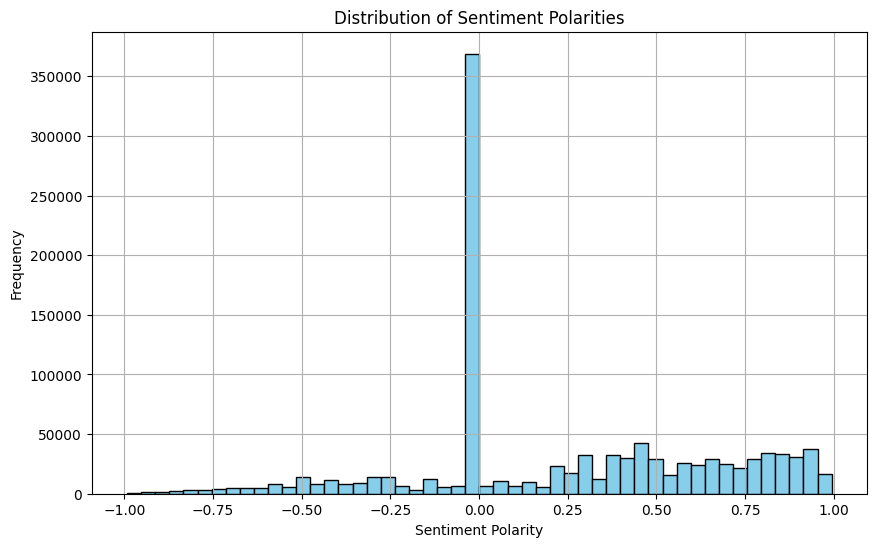

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment polarities
plt.figure(figsize=(10, 6))
plt.hist(word_embedding2['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarities')
plt.grid(True)
plt.show()

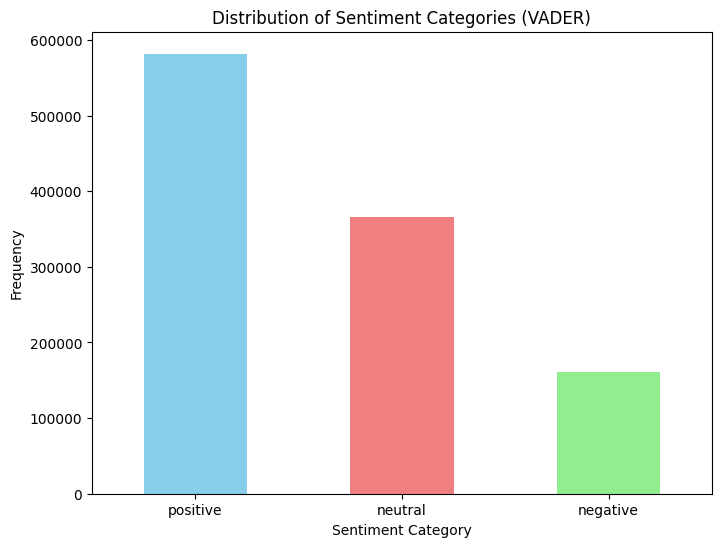

In [ ]:
# Function to categorize sentiment polarity using VADER
def categorize_sentiment_vader(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER-based categorization to each row in the DataFrame
word_embedding2['sentiment_category'] = word_embedding2['sentiment'].apply(categorize_sentiment_vader)

# Count the frequency of each sentiment category
sentiment_counts = word_embedding2['sentiment_category'].value_counts()

# Plot the bar graph of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories (VADER)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
word_embedding2.head()

date                                    lemmatized_text  \
0 2021-02-10  blue ridge bank share halted nyse bitcoin anno...   
1 2021-02-10  😎 today thats thursday take friend leowandersl...   
2 2021-02-10                guy evening read article like share   
3 2021-02-10            big chance billion price bitcoin crypto   
4 2021-02-10  network secured node today soon biggest bear r...   

                                              tokens  sentiment  \
0  [blue, ridge, bank, share, halted, nyse, bitco...     0.2960   
1  [😎, today, thats, thursday, take, friend, leow...     0.6808   
2         [guy, evening, read, article, like, share]     0.5719   
3     [big, chance, billion, price, bitcoin, crypto]     0.2500   
4  [network, secured, node, today, soon, biggest,...    -0.2023   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           negative

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Replace 'created_at' with the actual column name containing the dates in your dataset
date_column =word_embedding2['date']

# Find the minimum and maximum dates in the dataset
start_date = date_column.min()
end_date = date_column.max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2021-02-05 00:00:00
End Date: 2021-12-30 00:00:00


In [ ]:
import yfinance as yf

# Define the ticker symbol for Bitcoin
ticker_symbol = "BTC-USD"

# Define the start and end dates for the historical data
start_date = "2021-02-05"
end_date = "2021-12-30"

# Fetch the historical data for Bitcoin from Yahoo Finance
btc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the fetched data
print(btc_data)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   
...                  ...           ...           ...           ...   
2021-12-25  50854.917969  51176.597656  50236.707031  50429.859375   
2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625   
2021-12-27  50802.609375  51956.328125  50499.468750  50640.417969   
2021-12-28  50679.859375  50679.859375  47414.210938  47588.855469   
2021-12-29  47623.871094  48119.742188  46201.496094  46444.710938   

               Adj Close        Volume  
Date                                    
2021-02

In [ ]:
word_embedding2['date'] = pd.to_datetime(word_embedding2['date'])

In [ ]:
merged_data2= pd.merge(word_embedding2, btc_data, left_on='date', right_index=True, how='inner')

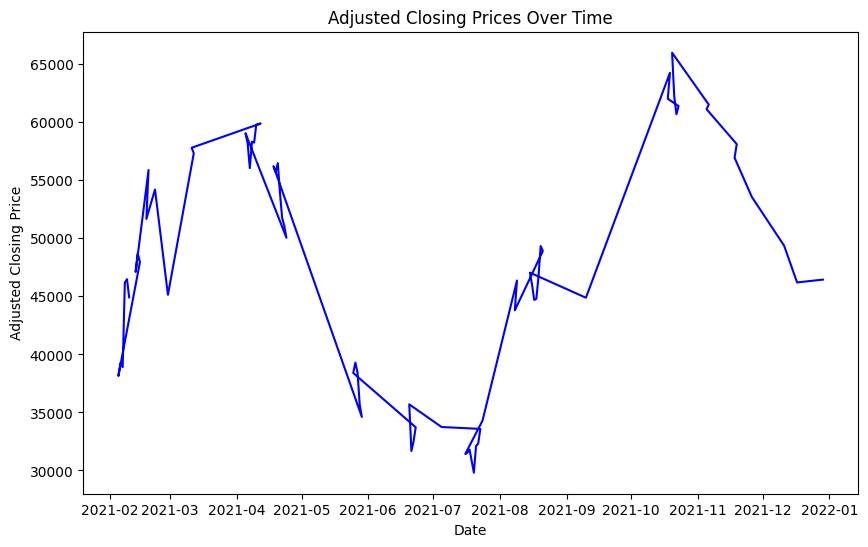

In [ ]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(merged_data2['date'], merged_data2['Adj Close'], color='blue')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

In [ ]:
# Save the tokenized dataframe to a CSV file
merged_data2.to_csv('/content/merged_data22.csv', index=False)

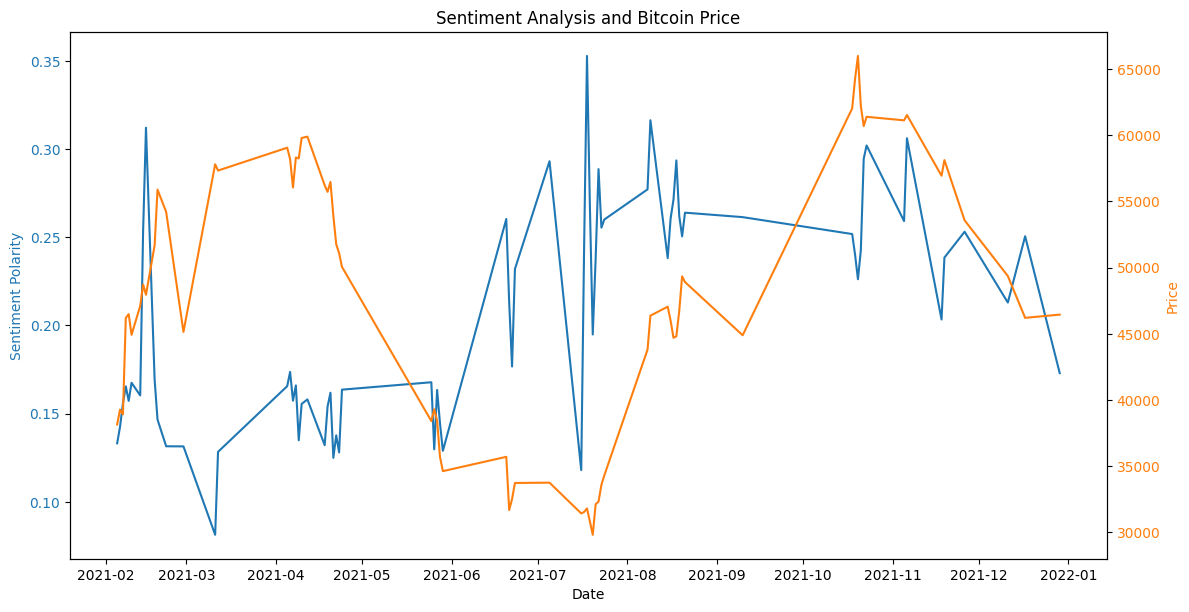

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('/content/merged_data22.csv')

# Convert the date column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group data by date and calculate average sentiment polarity and price
daily_sentiment = combined_data.groupby('date')['sentiment'].mean()
daily_price = combined_data.groupby('date')['Close'].mean()

# Plot both sentiment polarity and Bitcoin price on the same graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Polarity', color=color)
ax1.plot(daily_sentiment.index, daily_sentiment.values, label='Sentiment Polarity', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Price', color=color)
ax2.plot(daily_price.index, daily_price.values, label='Bitcoin Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Sentiment Analysis and Bitcoin Price')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/merged_data22.csv')

# Calculate the correlation coefficient between sentiment and Bitcoin price
correlation = data['sentiment'].corr(data['Close'])

print("Correlation coefficient between sentiment and Bitcoin price:", correlation)


Correlation coefficient between sentiment and Bitcoin price: 0.012429316768029991


for lemmatized data 2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


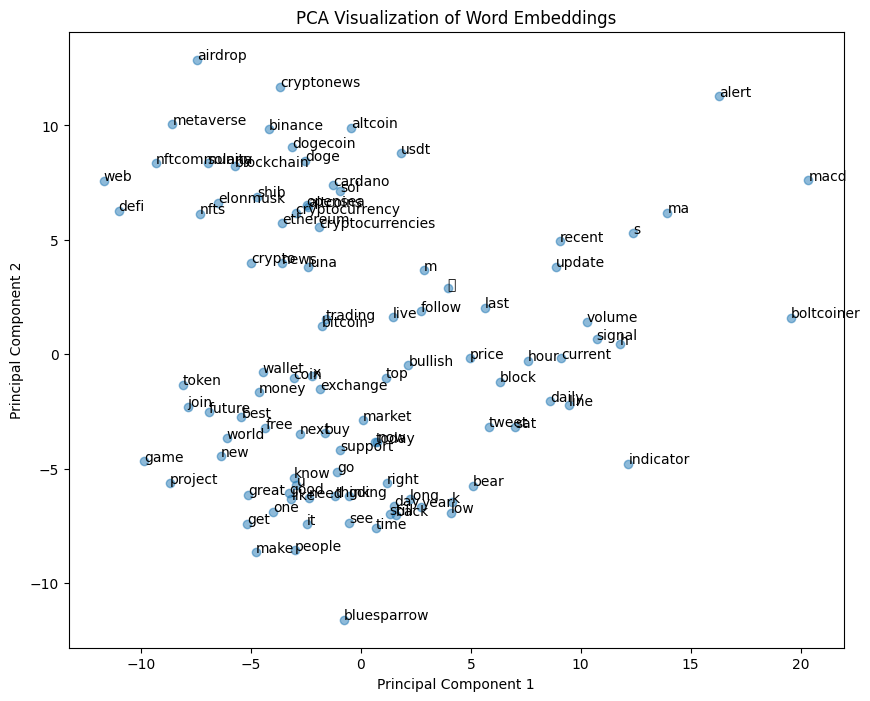

Word embedding completed and model saved.


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the DataFrame containing lemmatized text
# Replace '/content/lemmatized_text.csv' with the actual path to your CSV file
word_embedding1 = pd.read_csv('/content/lemmatized_text2.csv')

# Tokenize the lemmatized text
word_embedding1['tokens'] = word_embedding1['lemmatized_text'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=word_embedding1['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Access the Word2Vec embeddings
word_vectors = word2vec_model.wv

# Visualize Word Embeddings using PCA
def display_pca_scatterplot(word_vectors, sample_size=100):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(word_vectors.vectors[:sample_size])
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
    words = list(word_vectors.index_to_key)[:sample_size]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Visualization of Word Embeddings')
    plt.show()

# Display PCA scatterplot of word embeddings
display_pca_scatterplot(word_vectors)

# Save Word2Vec model
word2vec_model.save('/content/word2vec_model')

# Print message indicating completion
print("Word embedding completed and model saved.")


In [ ]:
# Find words most similar to a given word
similar_words = word2vec_model.wv.most_similar('bitcoin', topn=5)
print("Words most similar to 'bitcoin':", similar_words)


Words most similar to 'bitcoin': [('crypto', 0.6494039297103882), ('bitcoins', 0.6046065092086792), ('cryptocurrencies', 0.5727492570877075), ('cryptos', 0.5529012680053711), ('mean', 0.5297853946685791)]


In [ ]:
from sklearn.cluster import KMeans

# Cluster word vectors using KMeans
num_clusters = 5
kmeans_model = KMeans(n_clusters=num_clusters)
kmeans_model.fit(word_vectors.vectors)
cluster_labels = kmeans_model.labels_

# Print words in each cluster
for i in range(num_clusters):
    cluster_words = [word for word, label in zip(word_vectors.index_to_key, cluster_labels) if label == i]
    print(f"Cluster {i+1}:", cluster_words)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Cluster 2: ['bitcoin', 'crypto', 'price', 'cryptocurrency', 'ethereum', 'last', 'update', 'k', 'market', 'follow', 'buy', 'altcoin', 'trading', 'get', 'signal', '🚀', 'time', 's', 'cryptonews', 'recent', 'line', 'usdt', 'current', 'news', 'cardano', 'macd', 'day', 'volume', 'doge', 'tweet', 'daily', 'good', 'coin', 'see', 'bullish', 'alert', 'support', 'solana', 'go', 'ma', 'year', 'shib', 'cryptocurrencies', 'next', 'luna', 'top', 'sol', 'indicator', 'dogecoin', 'going', 'h', 'm', 'still', 'today', 'altcoins', 'long', 'hour', 'x', 'now', 'back', 'think', 'low', 'bear', 'right', 'min', 'come', 'since', 'change', 'soon', 'short', 'let', 'trade', 'look', 'pivot', 'trend', 'week', 'value', 'stock', 'take', 'sell', 'resistance', 'matic', 'high', 'big', 'avax', 'also', 'hodl', 'move', 'much', 'chart', 'coming', 'r', 'keep', 'say', 'could', 'trader', 'whale', 'month', 'following', 'cryptocrash', 'dollar', 'inflation', 'bull', 'minute', 'playing', 'buying', 'start', 'btcusd', 'opportunity', 'p

In [ ]:
# Perform word analogy
analogy_result = word2vec_model.wv.most_similar(positive=['increase', 'bitcoin'], negative=['bad','downfall'], topn=1)
print("Word analogy result:", analogy_result)


Word analogy result: [('pooled', 0.4343242347240448)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


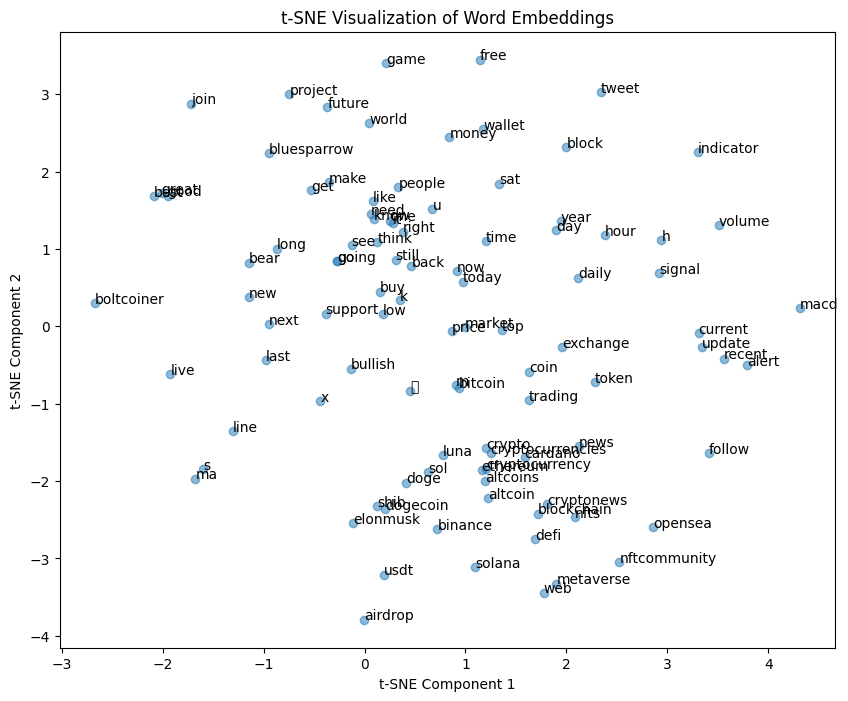

In [ ]:
from sklearn.manifold import TSNE

# Visualize word embeddings using t-SNE
def display_tsne_visualization(word_vectors, num_words=100):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_tsne = tsne.fit_transform(word_vectors.vectors[:num_words])
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
    words = list(word_vectors.index_to_key)[:num_words]
    for i, word in enumerate(words):
        plt.annotate(word, xy=(embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

# Display t-SNE visualization of word embeddings
display_tsne_visualization(word_vectors)


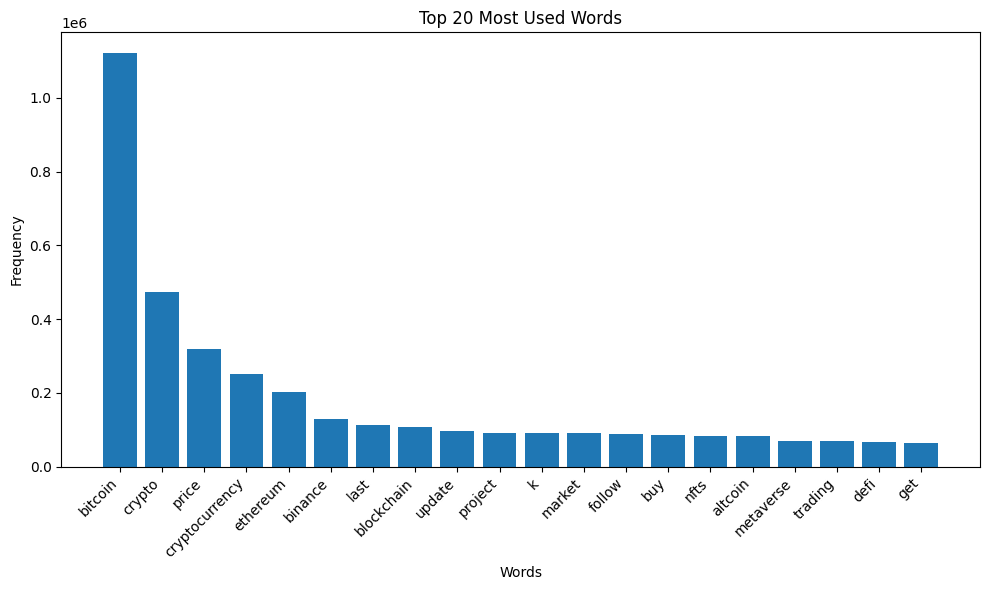

In [ ]:
from collections import Counter

# Count the frequency of each word in the corpus
word_freq = Counter(word_embedding1['tokens'].explode())

# Select the top N most frequent words
top_n = 20  # Change this value as needed
most_common_words = word_freq.most_common(top_n)

# Extract words and their frequencies
words, frequencies = zip(*most_common_words)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Used Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


TEXTBLOB

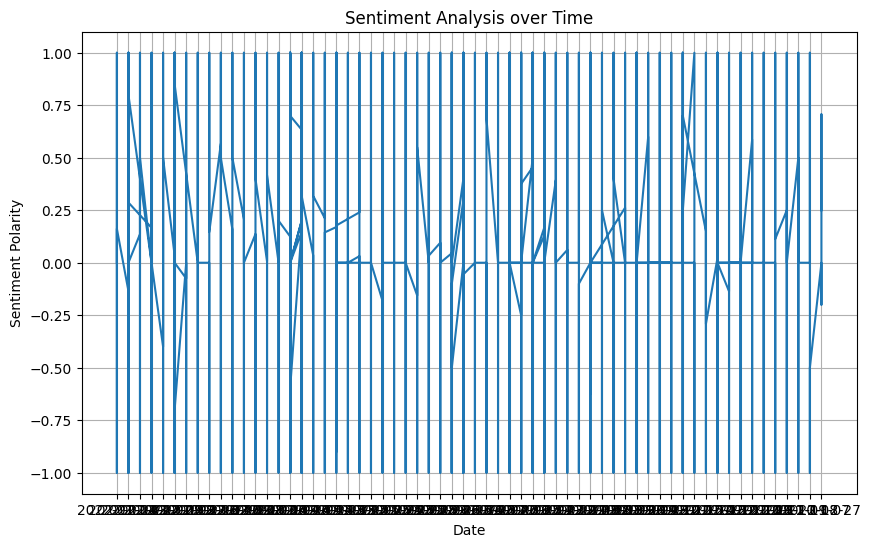

In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to each row in the DataFrame
word_embedding1['sentiment'] = word_embedding1['lemmatized_text'].apply(calculate_sentiment)

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(word_embedding1['date'], word_embedding1['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis over Time')
plt.grid(True)
plt.show()


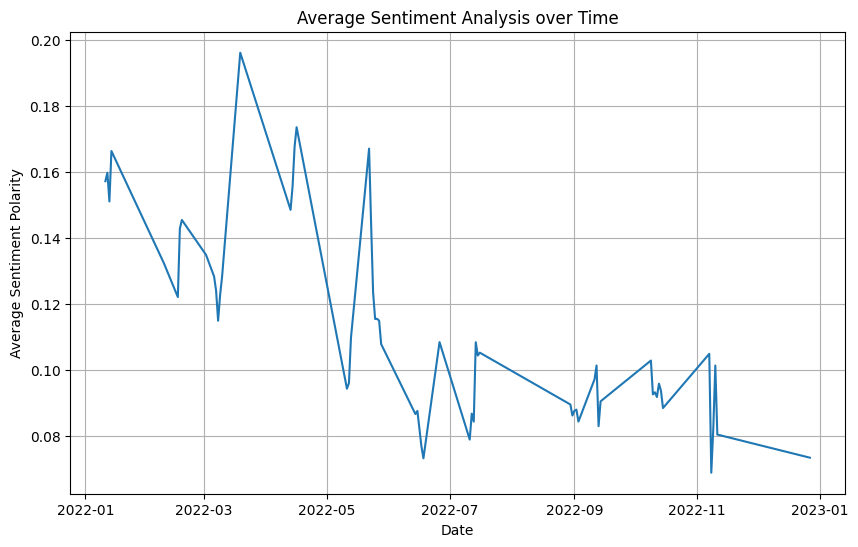

In [ ]:
# Convert 'date' column to datetime format
word_embedding1['date'] = pd.to_datetime(word_embedding1['date'])

# Group the data by date and calculate the average sentiment for each date
sentiment_by_date = word_embedding1.groupby('date')['sentiment'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date['date'], sentiment_by_date['sentiment'])
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Analysis over Time')
plt.grid(True)
plt.show()


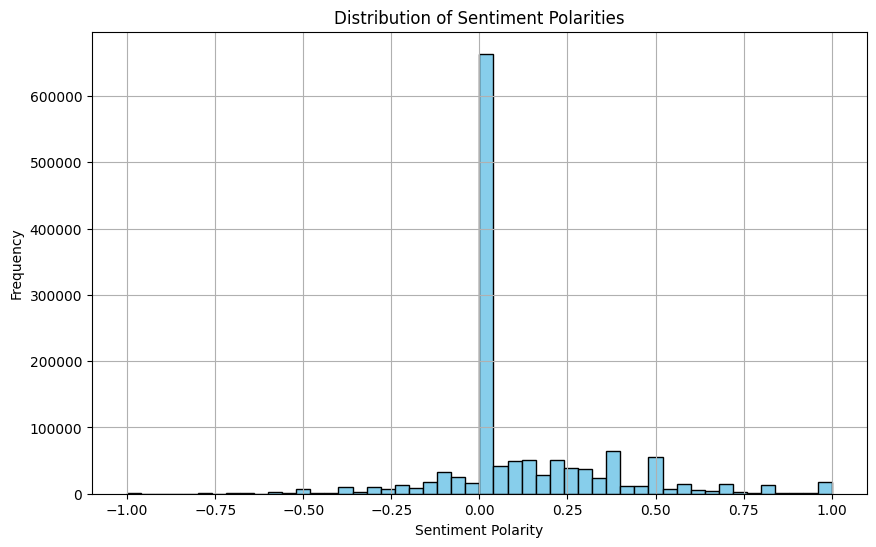

In [ ]:
# Plot the distribution of sentiment polarities
plt.figure(figsize=(10, 6))
plt.hist(word_embedding1['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarities')
plt.grid(True)
plt.show()


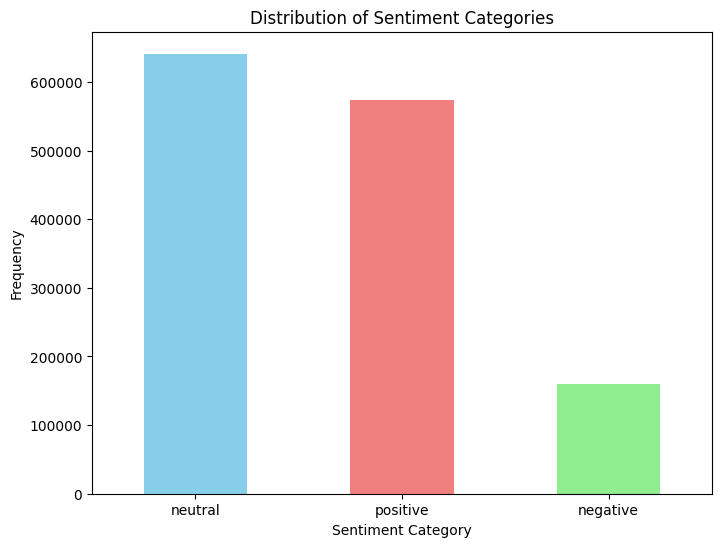

In [ ]:
# Function to categorize sentiment polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply categorization to each row in the DataFrame
word_embedding1['sentiment_category'] = word_embedding1['sentiment'].apply(categorize_sentiment)

# Count the frequency of each sentiment category
sentiment_counts = word_embedding1['sentiment_category'].value_counts()

# Plot the bar graph of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories')
plt.xticks(rotation=0)
plt.show()


In [ ]:
word_embedding1.head()

date                                    lemmatized_text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sat bitcoiners amazing...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  sentiment  \
0                      [death, cross, bitcoin, dump]        0.0   
1    [bitcoin, revolutionizing, insurance, industry]        0.0   
2       [teaser, bitcoin, cryptocurrency, furniture]        0.0   
3  [claiming, free, lightning, sat, bitcoiners, a...        0.5   
4  [mentalist, hey, please, check, hand, drawing,...        0.4   

  sentiment_category sentiment_class  
0            neutral         neutral  
1            neutral         neutral  
2            neutral         neutral  
3           positive        positive  
4           positive        positive

In [ ]:
# Keep only the 'date' column and the 'tokens_corrected' column
word_embedding1 = word_embedding1.loc[:, ['date', 'lemmatized_text','tokens','sentiment','sentiment_category']]

# Print the first few rows of the DataFrame with only the desired columns
print(word_embedding1.head())

        date                                    lemmatized_text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sat bitcoiners amazing...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  sentiment  \
0                      [death, cross, bitcoin, dump]        0.0   
1    [bitcoin, revolutionizing, insurance, industry]        0.0   
2       [teaser, bitcoin, cryptocurrency, furniture]        0.0   
3  [claiming, free, lightning, sat, bitcoiners, a...        0.5   
4  [mentalist, hey, please, check, hand, drawing,...        0.4   

  sentiment_category  
0            neutral  
1            neutral  
2            neutral  
3           positive  
4           positive  


getting bitcoin data

In [ ]:
pip install yfinance

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Replace 'created_at' with the actual column name containing the dates in your dataset
date_column =word_embedding1['date']

# Find the minimum and maximum dates in the dataset
start_date = date_column.min()
end_date = date_column.max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2022-01-11 00:00:00
End Date: 2022-12-27 00:00:00


In [ ]:
import yfinance as yf

# Define the ticker symbol for Bitcoin
ticker_symbol = "BTC-USD"

# Define the start and end dates for the historical data
start_date = "2022-01-11"
end_date = "2022-12-27"

# Fetch the historical data for Bitcoin from Yahoo Finance
btc_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the fetched data
print(btc_data)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2022-01-11  41819.507812  43001.156250  41407.753906  42735.855469   
2022-01-12  42742.179688  44135.367188  42528.988281  43949.101562   
2022-01-13  43946.742188  44278.421875  42447.042969  42591.570312   
2022-01-14  42598.871094  43346.687500  41982.617188  43099.699219   
2022-01-15  43101.898438  43724.671875  42669.035156  43177.398438   
...                  ...           ...           ...           ...   
2022-12-22  16818.380859  16866.673828  16592.408203  16830.341797   
2022-12-23  16829.644531  16905.218750  16794.458984  16796.953125   
2022-12-24  16796.976562  16864.703125  16793.527344  16847.755859   
2022-12-25  16847.505859  16860.554688  16755.253906  16841.986328   
2022-12-26  16842.250000  16920.123047  16812.369141  16919.804688   

               Adj Close       Volume  
Date                                   
2022-01-1

In [ ]:
word_embedding1['date'] = pd.to_datetime(word_embedding1['date'])

In [ ]:
merged_data1 = pd.merge(word_embedding1, btc_data, left_on='date', right_index=True, how='inner')

In [ ]:
print(merged_data1.head)

<bound method NDFrame.head of               date                                    lemmatized_text  \
0       2022-01-14                           death cross bitcoin dump   
1       2022-01-14         bitcoin revolutionizing insurance industry   
2       2022-01-14            teaser bitcoin cryptocurrency furniture   
3       2022-01-14  claiming free lightning sat bitcoiners amazing...   
4       2022-01-14  mentalist hey please check hand drawing item f...   
...            ...                                                ...   
1374649 2022-11-07  mblusdt bear alert x volume price min volume c...   
1374650 2022-11-07  mybreakthroughplan use due house rent buy dip ...   
1374651 2022-11-07  looking foward space tonight lfgg bring white ...   
1374652 2022-11-07  apecoin get released immediately added thats m...   
1374653 2022-11-07                                 monster fake out 😱   

                                                    tokens  sentiment  \
0                   

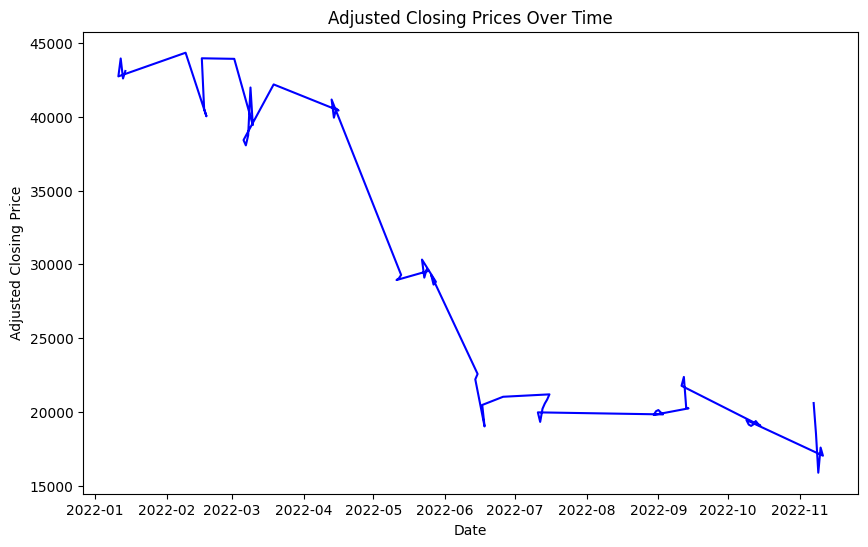

In [ ]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(merged_data1['date'], merged_data1['Adj Close'], color='blue')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

In [ ]:
# Save the tokenized dataframe to a CSV file
merged_data1.to_csv('/content/merged_data1.csv', index=False)

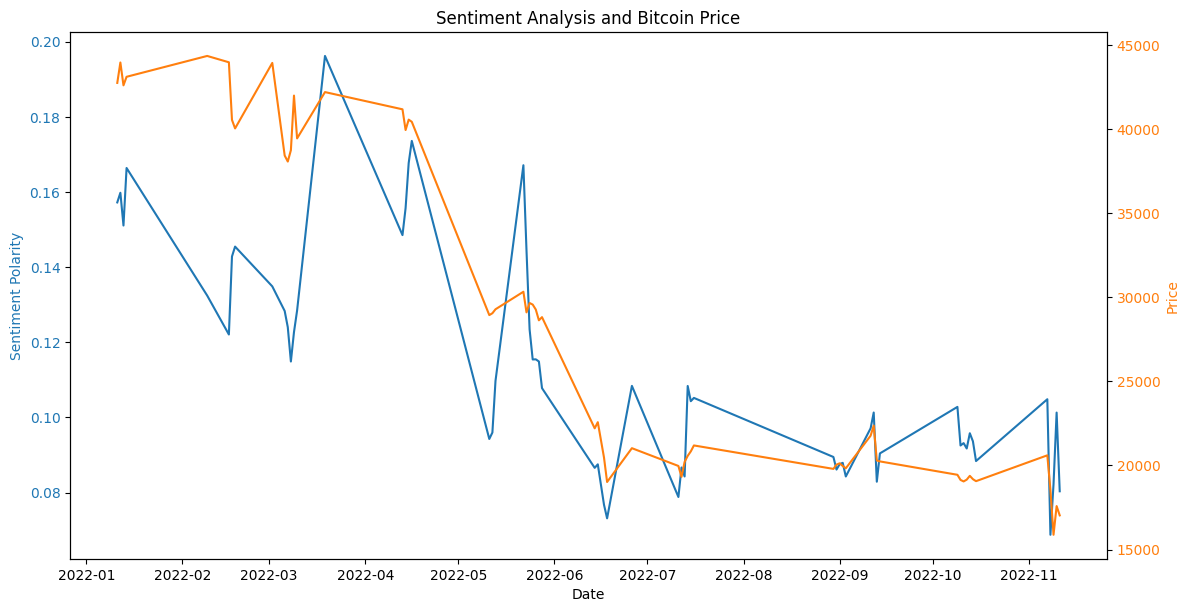

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('/content/merged_data1.csv')

# Convert the date column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group data by date and calculate average sentiment polarity and price
daily_sentiment = combined_data.groupby('date')['sentiment'].mean()
daily_price = combined_data.groupby('date')['Close'].mean()

# Plot both sentiment polarity and Bitcoin price on the same graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Polarity', color=color)
ax1.plot(daily_sentiment.index, daily_sentiment.values, label='Sentiment Polarity', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Price', color=color)
ax2.plot(daily_price.index, daily_price.values, label='Bitcoin Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Sentiment Analysis and Bitcoin Price')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/merged_data1.csv')

# Calculate the correlation coefficient between sentiment and Bitcoin price
correlation = data['sentiment'].corr(data['Close'])

print("Correlation coefficient between sentiment and Bitcoin price:", correlation)


Correlation coefficient between sentiment and Bitcoin price: 0.1104408496937862


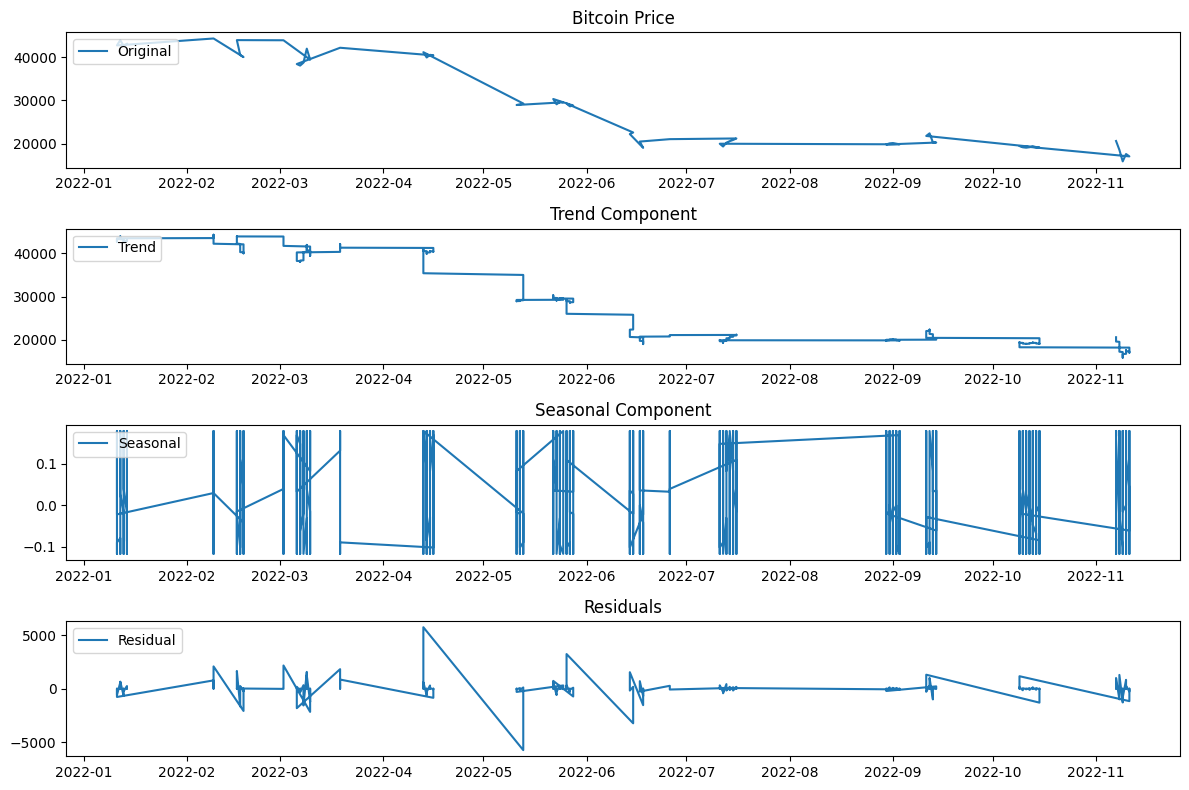

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('/content/merged_data1.csv')

# Convert 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # Assuming a period of 30 days

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Bitcoin Price')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()


VEDAR

In [ ]:
!pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


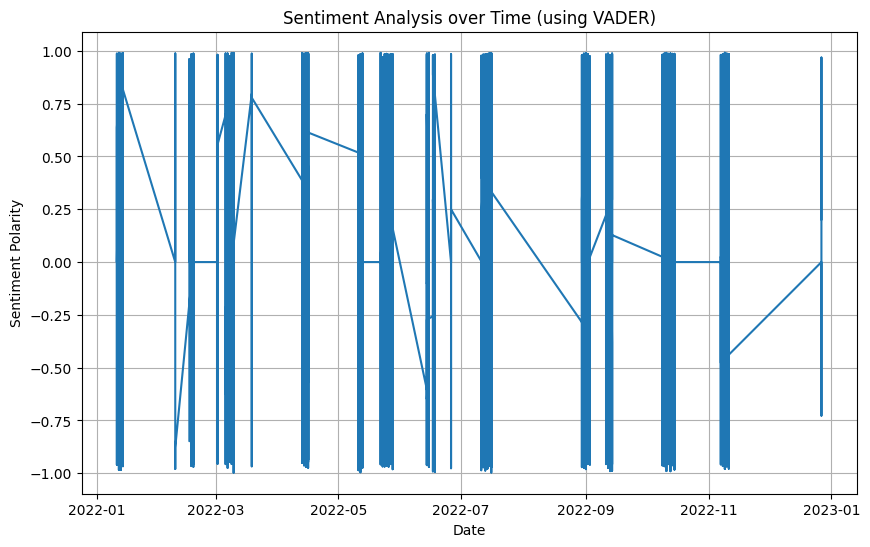

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to calculate sentiment polarity using VADER
def calculate_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to each row in the DataFrame
word_embedding1['sentiment'] = word_embedding1['lemmatized_text'].apply(calculate_sentiment)

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(word_embedding1['date'], word_embedding1['sentiment'])
plt.xlabel('Date')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis over Time (using VADER)')
plt.grid(True)
plt.show()


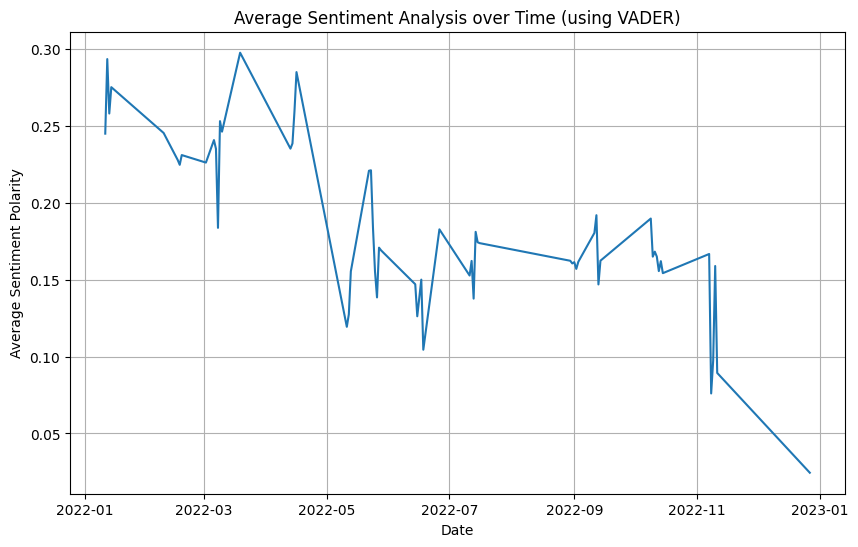

In [ ]:
# Group the data by date and calculate the average sentiment for each date
sentiment_by_date = word_embedding1.groupby('date')['sentiment'].mean().reset_index()

# Plot the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date['date'], sentiment_by_date['sentiment'])
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Analysis over Time (using VADER)')
plt.grid(True)
plt.show()

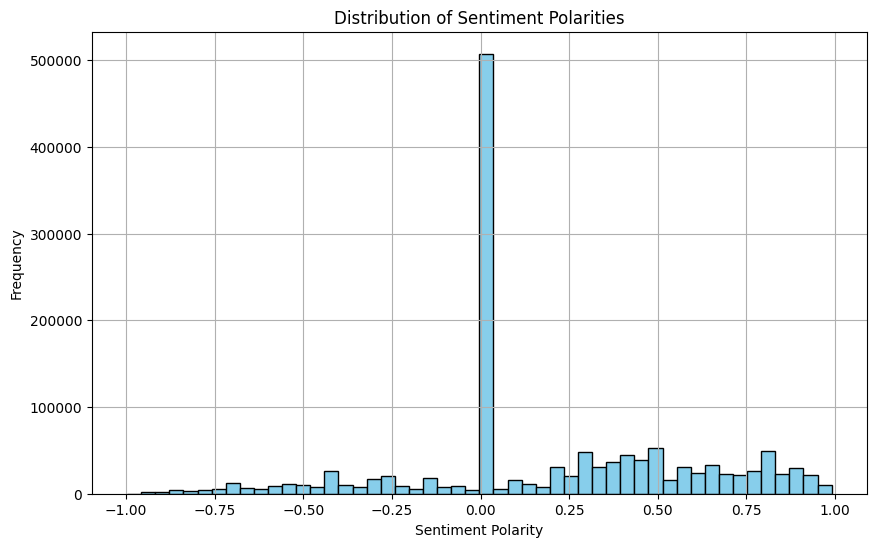

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment polarities
plt.figure(figsize=(10, 6))
plt.hist(word_embedding1['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarities')
plt.grid(True)
plt.show()


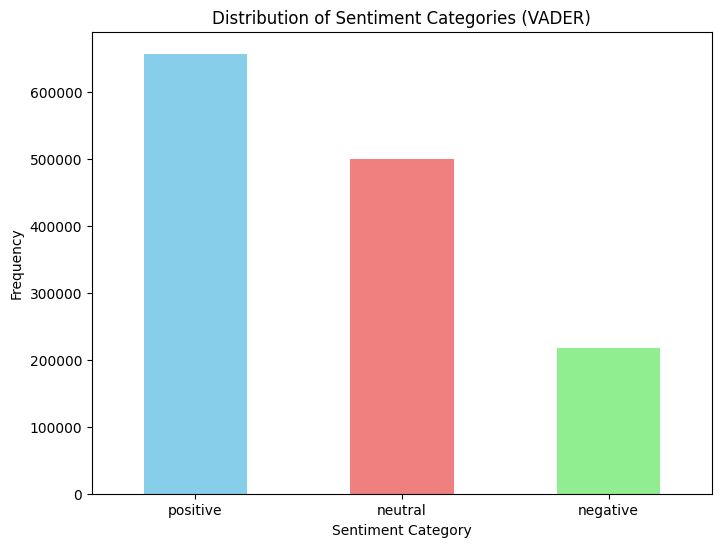

In [ ]:
# Function to categorize sentiment polarity using VADER
def categorize_sentiment_vader(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER-based categorization to each row in the DataFrame
word_embedding1['sentiment_category'] = word_embedding1['sentiment'].apply(categorize_sentiment_vader)

# Count the frequency of each sentiment category
sentiment_counts = word_embedding1['sentiment_category'].value_counts()

# Plot the bar graph of sentiment categories
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Categories (VADER)')
plt.xticks(rotation=0)
plt.show()


In [ ]:
word_embedding1.head()

date                                    lemmatized_text  \
0 2022-01-14                           death cross bitcoin dump   
1 2022-01-14         bitcoin revolutionizing insurance industry   
2 2022-01-14            teaser bitcoin cryptocurrency furniture   
3 2022-01-14  claiming free lightning sat bitcoiners amazing...   
4 2022-01-14  mentalist hey please check hand drawing item f...   

                                              tokens  sentiment  \
0                      [death, cross, bitcoin, dump]    -0.7579   
1    [bitcoin, revolutionizing, insurance, industry]     0.0000   
2       [teaser, bitcoin, cryptocurrency, furniture]    -0.2500   
3  [claiming, free, lightning, sat, bitcoiners, a...     0.7964   
4  [mentalist, hey, please, check, hand, drawing,...     0.8316   

  sentiment_category  
0           negative  
1            neutral  
2           negative  
3           positive  
4           positive

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# Replace 'created_at' with the actual column name containing the dates in your dataset
date_column =word_embedding1['date']

# Find the minimum and maximum dates in the dataset
start_date = date_column.min()
end_date = date_column.max()

print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 2022-01-11 00:00:00
End Date: 2022-12-27 00:00:00


In [ ]:
word_embedding1['date'] = pd.to_datetime(word_embedding1['date'])

In [ ]:
merged_data11 = pd.merge(word_embedding1, btc_data, left_on='date', right_index=True, how='inner')

In [ ]:
print(merged_data11.head)

<bound method NDFrame.head of               date                                    lemmatized_text  \
0       2022-01-14                           death cross bitcoin dump   
1       2022-01-14         bitcoin revolutionizing insurance industry   
2       2022-01-14            teaser bitcoin cryptocurrency furniture   
3       2022-01-14  claiming free lightning sat bitcoiners amazing...   
4       2022-01-14  mentalist hey please check hand drawing item f...   
...            ...                                                ...   
1374649 2022-11-07  mblusdt bear alert x volume price min volume c...   
1374650 2022-11-07  mybreakthroughplan use due house rent buy dip ...   
1374651 2022-11-07  looking foward space tonight lfgg bring white ...   
1374652 2022-11-07  apecoin get released immediately added thats m...   
1374653 2022-11-07                                 monster fake out 😱   

                                                    tokens  sentiment  \
0                   

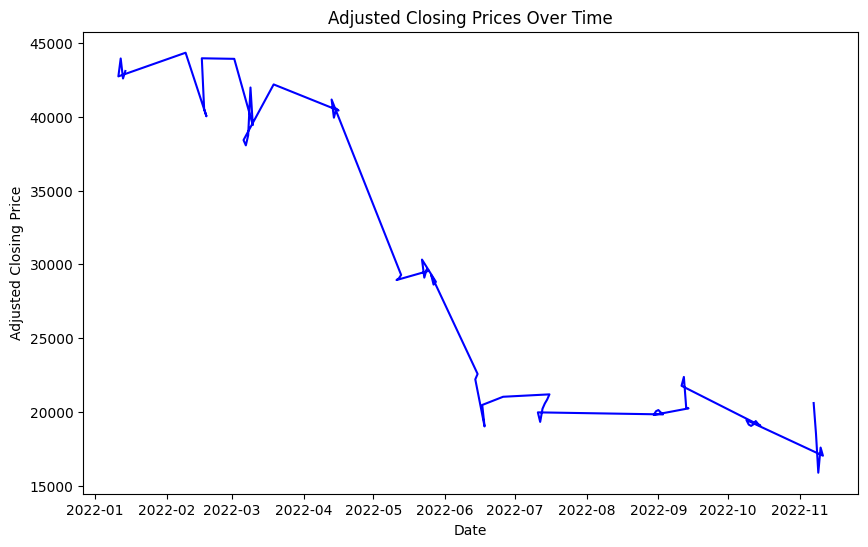

In [ ]:
# Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(merged_data1['date'], merged_data1['Adj Close'], color='blue')
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

In [ ]:
# Save the tokenized dataframe to a CSV file
merged_data1.to_csv('/content/merged_data11.csv', index=False)

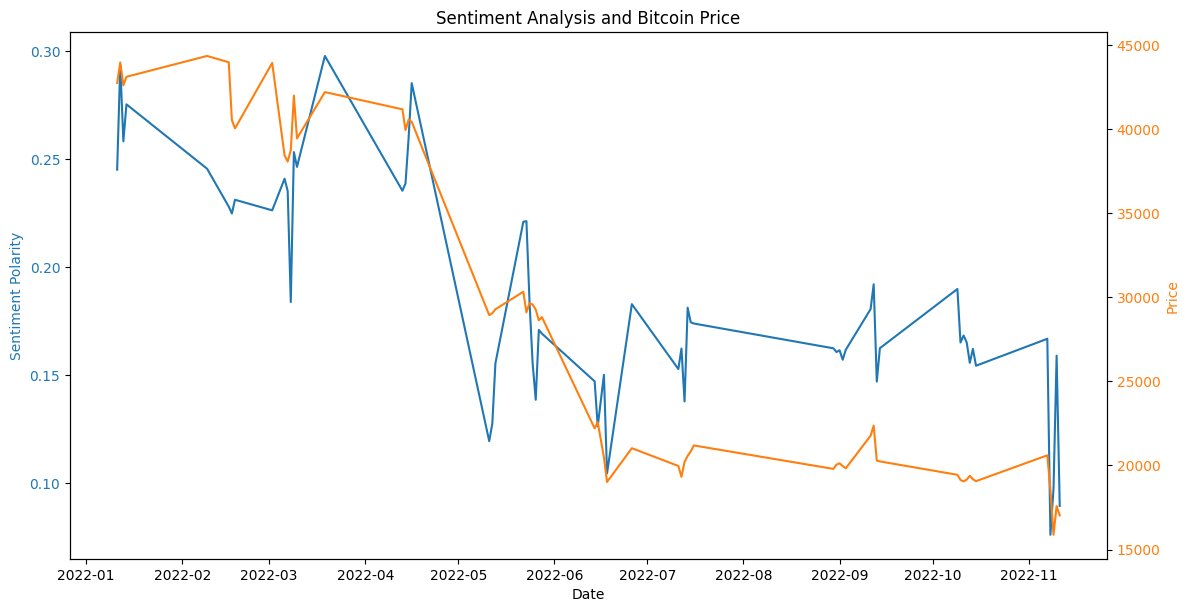

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined data
combined_data = pd.read_csv('/content/merged_data11.csv')

# Convert the date column to datetime format
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Group data by date and calculate average sentiment polarity and price
daily_sentiment = combined_data.groupby('date')['sentiment'].mean()
daily_price = combined_data.groupby('date')['Close'].mean()

# Plot both sentiment polarity and Bitcoin price on the same graph
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Polarity', color=color)
ax1.plot(daily_sentiment.index, daily_sentiment.values, label='Sentiment Polarity', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Price', color=color)
ax2.plot(daily_price.index, daily_price.values, label='Bitcoin Price', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Sentiment Analysis and Bitcoin Price')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/merged_data11.csv')

# Calculate the correlation coefficient between sentiment and Bitcoin price
correlation = data['sentiment'].corr(data['Close'])

print("Correlation coefficient between sentiment and Bitcoin price:", correlation)

Correlation coefficient between sentiment and Bitcoin price: 0.11837437976254803


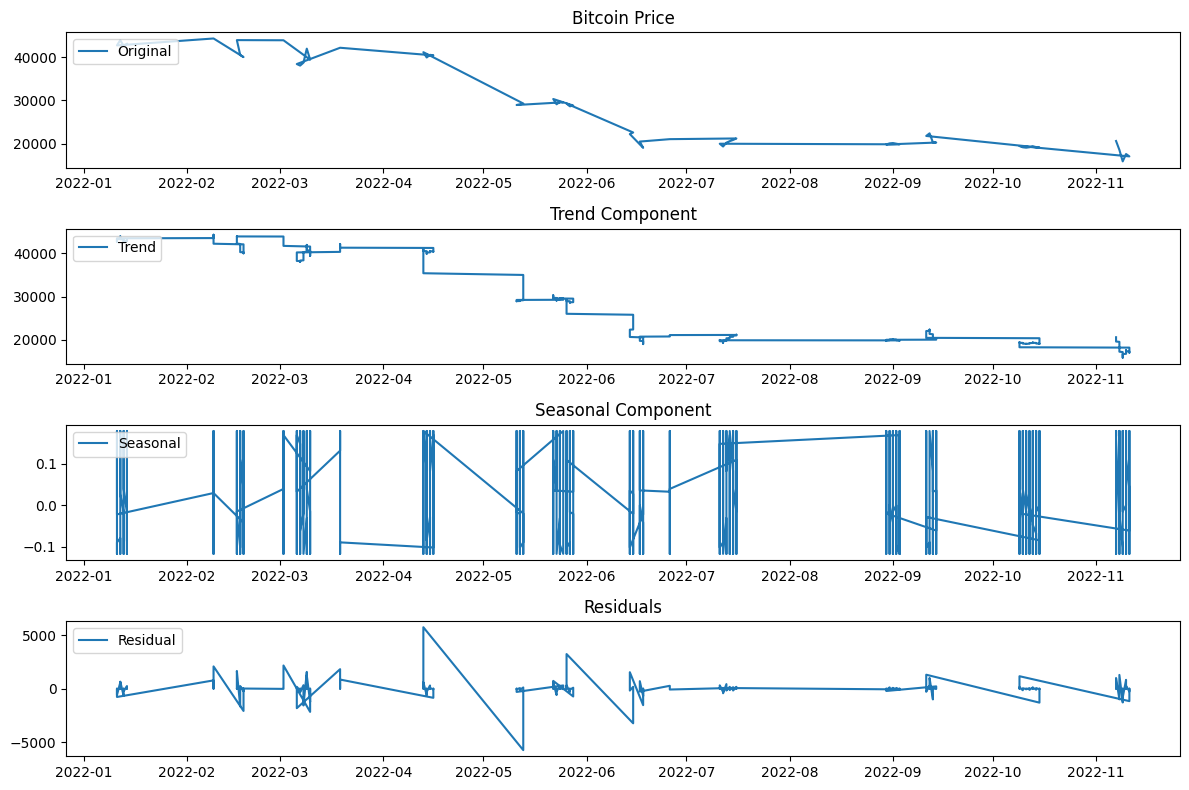

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('/content/merged_data11.csv')

# Convert 'date' column to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='additive', period=30)  # Assuming a period of 30 days

# Plot the seasonal decomposition
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Bitcoin Price')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()


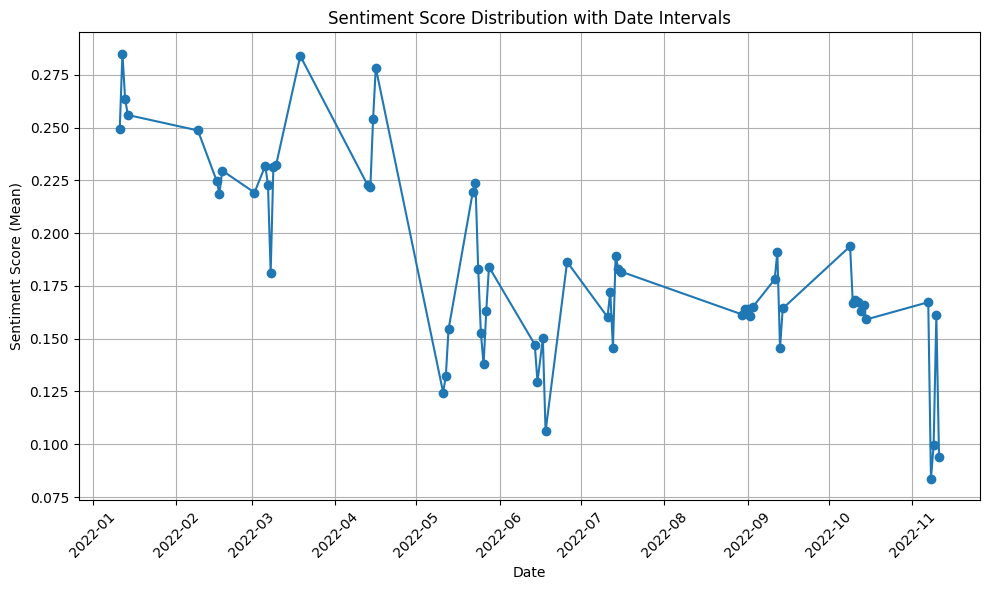

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the selected data containing the 'date' and 'lemmatized_text' columns
selected_data = pd.read_csv('/content/merged_data11.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Apply sentiment analysis using VADER to the 'lemmatized_text' column
selected_data['vader_sentiment'] = selected_data['lemmatized_text'].apply(get_vader_sentiment)

# Convert the 'date' column to datetime format
selected_data['date'] = pd.to_datetime(selected_data['date'])

# Define the date interval for binning (e.g., by day)
date_interval = 'D'

# Aggregate sentiment scores into bins based on date intervals and calculate the mean sentiment score for each bin
sentiment_by_date = selected_data.resample(date_interval, on='date')['vader_sentiment'].mean().dropna()

# Plot sentiment score distribution with respect to date intervals
plt.figure(figsize=(10, 6))
plt.plot(sentiment_by_date.index, sentiment_by_date.values, marker='o', linestyle='-')
plt.title('Sentiment Score Distribution with Date Intervals')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (Mean)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()